# House Prices - Advanced Regression Techniques

We explore a dataset from [Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques) containing information on residential homes in Ames, Iowa. With data on nearly 80 features our task is to predict the price of each home. The abundance of features means we will have plenty of opportunities for feature engineering. Ultimately we finish with a Kaggle submission placing us at the 22nd percentile on Kaggle's leaderboard, which is not too bad for a first attempt. Let's begin!

## Imports

We import the standard libraries.

In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid') # preferred seaborn aesthetic
%matplotlib inline

We read in the training and test sets as provided by Kaggle. We index both via the **Id** column.

In [100]:
train = pd.read_csv('train.csv', index_col = 'Id')
test = pd.read_csv('test.csv', index_col = 'Id')

We concatenate the two dataframes to facilitate simultaneous feature engineering.

In [101]:
df = pd.concat([train, test])

## EDA

Let's take a look at our data.

In [102]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [103]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [104]:
train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


As we can see we have plenty of features to work with. A description of each feature can be found in description.txt.

Our target is the **SalePrice** column. Let's begin with a brief examination of our target.

In [105]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

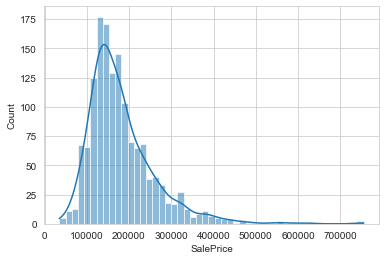

In [106]:
sns.histplot(data = train,x = 'SalePrice', kde = True)

We have quite a range of values and the data appears to be skewed right. We note that Kaggle will score our data by computing the RMSE after apply a logarithmic transformation. Thus we shall apply a logarithmic transformation to the data, which will also help reduce skewness.

In [107]:
from scipy import stats

In [108]:
# apply a logarithmic transformation to SalePrice
train['LogSalePrice'] = train['SalePrice'].apply(np.log)

# see how the transformation affects skewness
print('Skewness of original SalePrice:', stats.skew(train['SalePrice']))
print('Skewness of transformed SalePrice', stats.skew(train['LogSalePrice']))

Skewness of original SalePrice: 1.880940746034036
Skewness of transformed SalePrice 0.1212103673013655


<AxesSubplot:xlabel='LogSalePrice', ylabel='Count'>

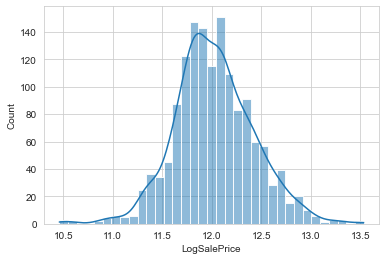

In [109]:
sns.histplot(data = train, x = 'LogSalePrice', kde = True)

The transformed **SalePrice** data has a much smaller range of values and more closely resembles a normal distribution. As such we will drop **SalePrice**, instead preferring to work with **LogSalePrice**.

In [110]:
# drop the sale price feature
train.drop('SalePrice', axis = 1, inplace = True)

# redefine the main dataframe
df = pd.concat([train, test])

Now let's see how our numerical features correlate with **LogSalePrice**.

<AxesSubplot:>

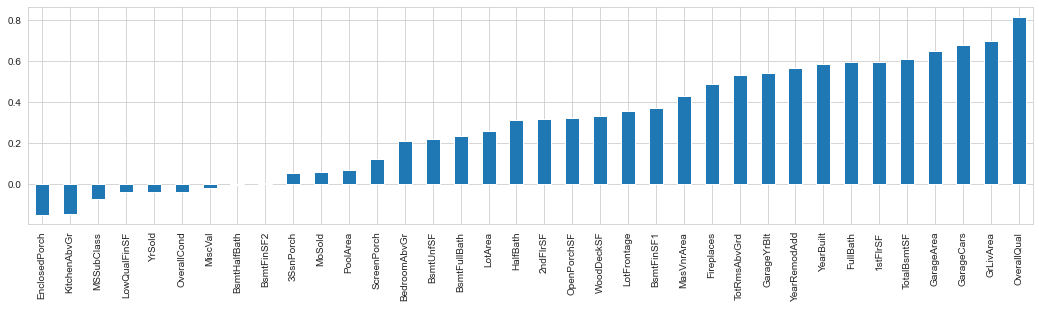

In [111]:
plt.figure(figsize = (18, 4))
train.corr()['LogSalePrice'].drop(['LogSalePrice']).sort_values().plot(kind = 'bar')

We seem to have several numerical features which correlate quite decently with **LogSalePrice**. How many of our features are numerical and how many are categorical?

In [112]:
print('Number of numerical features:', len(df.select_dtypes(include = np.number).columns))
print('Number of categorical features:', len(df.select_dtypes(exclude = np.number).columns))

Number of numerical features: 37
Number of categorical features: 43


We have a roughly even split of numerical and categorical data.

## Missing Data

Let's take a look at how much of our data is missing.

In [113]:
# create a list of features with missing data
miss_cols = []
for col in df.columns:
    if df[col].isna().sum() > 0:
        miss_cols.append(col)

# print the percentage of data missing for each feature
print(100 * df[miss_cols].isna().sum() / len(df))
print('\n')

# print the number of features with missing data
print('Number of features with missing data:', len(miss_cols))

MSZoning         0.137033
LotFrontage     16.649538
Alley           93.216855
Utilities        0.068517
Exterior1st      0.034258
Exterior2nd      0.034258
MasVnrType       0.822199
MasVnrArea       0.787941
BsmtQual         2.774923
BsmtCond         2.809181
BsmtExposure     2.809181
BsmtFinType1     2.706406
BsmtFinSF1       0.034258
BsmtFinType2     2.740665
BsmtFinSF2       0.034258
BsmtUnfSF        0.034258
TotalBsmtSF      0.034258
Electrical       0.034258
BsmtFullBath     0.068517
BsmtHalfBath     0.068517
KitchenQual      0.034258
Functional       0.068517
FireplaceQu     48.646797
GarageType       5.378554
GarageYrBlt      5.447071
GarageFinish     5.447071
GarageCars       0.034258
GarageArea       0.034258
GarageQual       5.447071
GarageCond       5.447071
PoolQC          99.657417
Fence           80.438506
MiscFeature     96.402878
SaleType         0.034258
LogSalePrice    49.982871
dtype: float64


Number of features with missing data: 35


Nearly half of our features are missing data. Fortunately, most such features are missing less than 3% of their data. Let's try to reasonably impute some values.

### Basement Features

There are several basement related features, namely **BsmtQual**, **BsmtCond**, **BsmtExposure**, **BsmtFinType1**, **BsmtFinSF1**, **BsmtFinType2**, **BsmtFinSF2**, **BsmtUnfSF**, **TotalBsmtSF**, **BsmtFullBath**, and **BsmtHalfBath**. Let's look at the houses missing data in at least one of these features.

In [114]:
# create a list of features related to basements
bsmt_feats = []
for col in train.columns:
    if 'Bsmt' in col:
        bsmt_feats.append(col)

# display the houses missing data in at least one of the above features
bsmt_df = df[bsmt_feats]
df[df[bsmt_feats].isna().any(axis = 1)]['TotalBsmtSF'].describe() # TotalBsmtSF is the total square footage of the basement

count      87.000000
mean      121.137931
std       449.777779
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      3206.000000
Name: TotalBsmtSF, dtype: float64

We note that the vast majority of houses with missing data in the basement features have no basement at all. That makes it quite easy to impute the missing values in those settings.

In [115]:
# certain basement features use 'NA' to indicate the lack of a basement
bsmt_feats_na = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']

# certain basement features use 0 to indicate the lack of a basement
bsmt_feats_0 = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']

# fill in the missing values for houses without basements
for col in bsmt_feats_na:
    df.loc[(df[col].isna()) & (df['TotalBsmtSF'] == 0), col] = 'NA'
for col in bsmt_feats_0:
    df.loc[(df[col].isna()) & (df['TotalBsmtSF'] == 0), col] = 0
    
# display the houses which are still missing data pertaining to basement features
df[df[bsmt_feats].isna().any(axis = 1)][bsmt_feats + ['OverallQual']]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath,OverallQual
Id,,,,,,,,,,,,
333,Gd,TA,No,GLQ,1124.0,NaN,479.0,1603.0,3206.0,1.0,0.0,8
949,Gd,TA,NaN,Unf,0.0,Unf,0.0,936.0,936.0,0.0,0.0,7
1488,Gd,TA,NaN,Unf,0.0,Unf,0.0,1595.0,1595.0,0.0,0.0,8
2041,Gd,NaN,Mn,GLQ,1044.0,Rec,382.0,0.0,1426.0,1.0,0.0,8
2121,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
2186,TA,NaN,No,BLQ,1033.0,Unf,0.0,94.0,1127.0,0.0,1.0,6
2218,NaN,Fa,No,Unf,0.0,Unf,0.0,173.0,173.0,0.0,0.0,4
2219,NaN,TA,No,Unf,0.0,Unf,0.0,356.0,356.0,0.0,0.0,4
2349,Gd,TA,NaN,Unf,0.0,Unf,0.0,725.0,725.0,0.0,0.0,5


The house with **Id** 2121 is missing all the data pertaining to basements. We shall simply assume this house has no basement.

In [116]:
df.loc[2121, bsmt_feats_na] = 'NA'
df.loc[2121, bsmt_feats_0] = 0

What about the remaining houses? Let's see what are the most common values for **BsmtQual**, **BsmtCond**, **BsmtExposure**, **BsmtFinType1**, and **BsmtFinType2**.

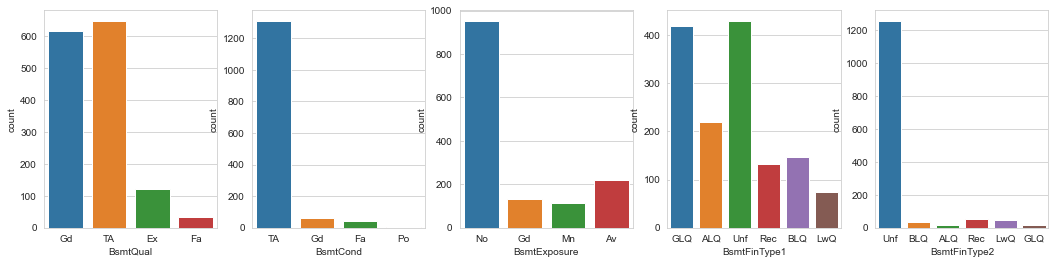

In [117]:
plt.figure(figsize = (18,4))
for i in range(0, len(bsmt_feats_na)):
    plt.subplot(1, len(bsmt_feats_na), i + 1)
    sns.countplot(data = train, x = bsmt_feats_na[i])

For the four houses missing a **BsmtCond** value we impute 'TA'. Similarly, for the four houses without a **BsmtExposure** value we impute 'No' and for the house without a **BsmtFinType2** value we impute 'Unf'.

In [118]:
# impute missing values
df['BsmtCond'].fillna('TA', inplace = True)
df['BsmtExposure'].fillna('No', inplace = True)
df['BsmtFinType2'].fillna('Unf', inplace = True)

# display rows still missing data in the basement features
df[df[bsmt_feats].isna().any(axis = 1)][bsmt_feats + ['OverallQual']]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath,OverallQual
Id,,,,,,,,,,,,
2218,NaN,Fa,No,Unf,0.0,Unf,0.0,173.0,173.0,0.0,0.0,4
2219,NaN,TA,No,Unf,0.0,Unf,0.0,356.0,356.0,0.0,0.0,4


What about the missing **BsmtQual** values? Fortunately **OverallQual** can help us decide.

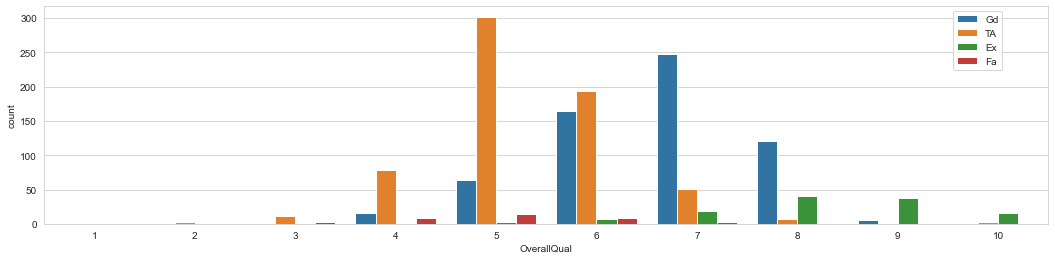

In [119]:
plt.figure(figsize = (18, 4))
sns.countplot(data = train, x = 'OverallQual', hue = 'BsmtQual')
plt.legend(bbox_to_anchor = (0.9, 1))

The two houses without **BsmtQual** values have an **OverallQual** of 4. Hence we should impute these missing **BsmtQual** values as 'TA'.

In [120]:
df['BsmtQual'].fillna('TA', inplace = True)

With that we are no longer missing any data pertaining to basement features.

In [121]:
df[bsmt_feats].isna().sum()

BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinSF1      0
BsmtFinType2    0
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
BsmtFullBath    0
BsmtHalfBath    0
dtype: int64

### Garage Features

We also have a variety of features related to garages, all of which are missing some data. These features are **GarageType**, **GarageYrBlt**, **GarageFinish**, **GarageCars**, **GarageArea**, **GarageQual**, and **GarageCond**. We proceed as in the basement features. Let's look at the houses with missing garage data.

In [122]:
# create a list of features related to garages
garage_feats = []

for col in train.columns:
    if 'Garage' in col:
        garage_feats.append(col)

# display the houses missing data in at least one of the above features
garage_df = df[garage_feats]
df[df[garage_feats].isna().any(axis = 1)]['GarageArea'].describe() # GarageArea is the total square footage of the garage

count    158.000000
mean       2.278481
std       28.640062
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max      360.000000
Name: GarageArea, dtype: float64

As was the case with the basements we note that most houses missing garage data lack garages. We impute appropriate values for these houses.

In [123]:
# certain garage features use 'NA' to indicate the lack of a garage
garage_feats_na = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']

# certain garage features use 0 to indicate the lack of a garage
garage_feats_0 = ['GarageCars', 'GarageArea']

# fill in the missing values for houses without garages
for col in garage_feats_na:
    df.loc[(df[col].isna()) & (df['GarageArea'] == 0), col] = 'NA'
for col in garage_feats_0:
    df.loc[(df[col].isna()) & (df['GarageArea'] == 0), col] = 0

# we impute the year the garage was built as the year the house was built
df.loc[df['GarageYrBlt'].isna(), 'GarageYrBlt'] = df.loc[df['GarageYrBlt'].isna(), 'YearBuilt']

# display the houses still missing data pertaining to garage features
df[df[garage_feats].isna().any(axis = 1)][garage_feats + ['OverallQual', 'YearBuilt']]

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,OverallQual,YearBuilt
Id,,,,,,,,,
2127,Detchd,1910.0,NaN,1.0,360.0,NaN,NaN,6,1910
2577,Detchd,1923.0,NaN,NaN,NaN,NaN,NaN,5,1923


**GarageType**, as the name suggests, indicates the type of garage a house has. The remaining two houses have garages as indicated by **GarageType**. Now to impute the appropriate values.

<AxesSubplot:xlabel='GarageCond', ylabel='count'>

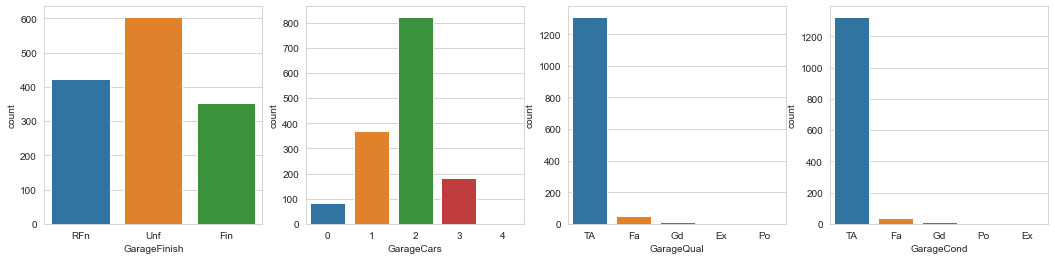

In [124]:
plt.figure(figsize = (18, 4))
plt.subplot(1, 4, 1)
sns.countplot(data = train, x = 'GarageFinish')
plt.subplot(1, 4, 2)
sns.countplot(data = train, x = 'GarageCars')
plt.subplot(1, 4, 3)
sns.countplot(data = train, x = 'GarageQual')
plt.subplot(1, 4, 4)
sns.countplot(data = train, x = 'GarageCond')

We can safely impute the missing **GarageQual** and **GarageCond** values as 'TA'.

In [125]:
# impute the missing values
df['GarageQual'].fillna('TA', inplace = True)
df['GarageCond'].fillna('TA', inplace = True)

# see which values are still missing
df[df[garage_feats].isna().any(axis = 1)][garage_feats + ['OverallQual']]

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,OverallQual
Id,,,,,,,,
2127,Detchd,1910.0,NaN,1.0,360.0,TA,TA,6
2577,Detchd,1923.0,NaN,NaN,NaN,TA,TA,5


As for **GarageFinish** and **GarageCars** we take a look at **OverallQual** first.

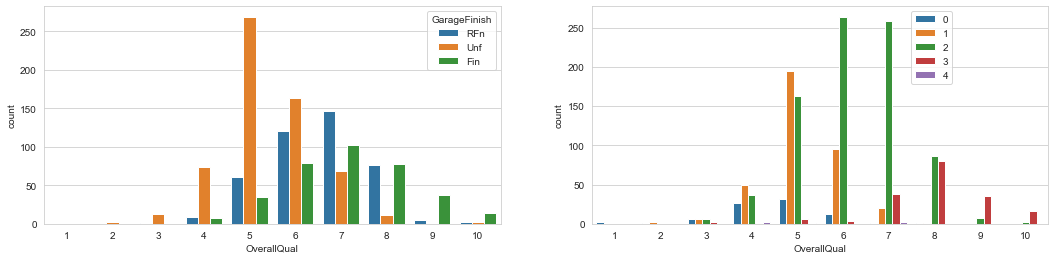

In [126]:
plt.figure(figsize = (18, 4))
plt.subplot(1, 2, 1)
sns.countplot(data = train, x = 'OverallQual', hue = 'GarageFinish')
plt.subplot(1, 2, 2)
sns.countplot(data = train, x = 'OverallQual', hue = 'GarageCars')
plt.legend(bbox_to_anchor = (0.8, 1))

We impute **GarageFinish** values of 'Unf' and a **GarageCars** value of 1.

In [127]:
df['GarageFinish'].fillna('Unf', inplace = True)
df['GarageCars'].fillna(1, inplace = True)
df[df[garage_feats].isna().any(axis = 1)][garage_feats + ['OverallQual']]

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,OverallQual
Id,,,,,,,,
2577,Detchd,1923.0,Unf,1.0,NaN,TA,TA,5


All that's left is to impute the missing **GarageArea** value. Let's see what correlates with **GarageArea** to inform our estimate.

<AxesSubplot:>

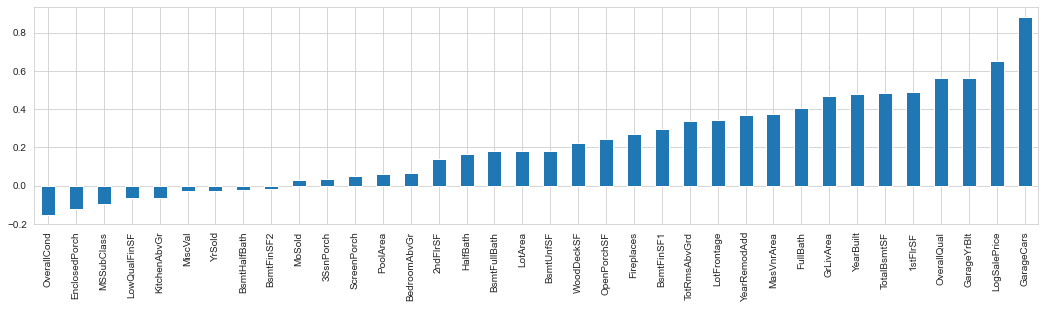

In [128]:
plt.figure(figsize = (18, 4))
train.corr()['GarageArea'].drop('GarageArea').sort_values().plot(kind = 'bar')

We impute the missing **GarageArea** value as the median for all houses with an **OverallQual** value of 5 and **GarageCars** value of 1.

In [129]:
df.loc[df['GarageArea'].isna(), 'GarageArea'] = train[(train['OverallQual'] == 5) & 
                                                      (train['GarageCars'] == 1)]['GarageArea'].median()

We are no longer missing any data in the features related to garages.

In [130]:
df[garage_feats].isna().sum()

GarageType      0
GarageYrBlt     0
GarageFinish    0
GarageCars      0
GarageArea      0
GarageQual      0
GarageCond      0
dtype: int64

### **Alley**, **FireplaceQu**, **PoolQC**, **MiscFeature**, and **Fence**

The features **Alley**, **FireplaceQu**, **PoolQC**, **MiscFeature**, and **Fence** have a large number of missing values. The reason is likely the same reason as to why the basement and garage features were missing data: the lack of the corresponding item.

Let's first look at **Alley**, which indicates the type of alley access a house has.

<AxesSubplot:xlabel='Alley', ylabel='count'>

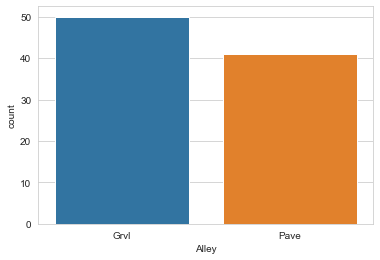

In [131]:
sns.countplot(data = train, x = 'Alley')

Nowhere in the training set does **Alley** take the value 'NA' to indicate the lack of an alley. Thus it is likely that the missing **Alley** values are supposed to be 'NA'.

In [132]:
df['Alley'].fillna('NA', inplace = True)

We next examine **FireplaceQu** which indicates the quality of the house's fireplace. In particular let's look at **Fireplaces**, which counts the number of fireplaces a house has, for the houses without **FireplaceQu** data.

In [133]:
df[df['FireplaceQu'].isna()]['Fireplaces'].describe()

count    1420.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: Fireplaces, dtype: float64

Every house without **FireplaceQu** data is lacking a fireplace. We impute the missing values as 'NA'.

In [134]:
df['FireplaceQu'].fillna('NA', inplace = True)

We can do the same with **PoolQC**, which measures the quality of a house's pool, and **PoolArea**, which provides the square footage of said pool.

In [135]:
df[df['PoolQC'].isna()]['PoolArea'].describe()

count    2909.000000
mean        0.471983
std        14.911857
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       561.000000
Name: PoolArea, dtype: float64

Once again most houses do not seem to have a pool. For these we impute **PoolQC** values of 'NA'.

In [136]:
# impute missing values
df.loc[(df['PoolQC'].isna()) & (df['PoolArea'] == 0), 'PoolQC'] = 'NA'

# see which houses are still missing PoolQC data
df[df['PoolQC'].isna()][['PoolQC', 'PoolArea', 'OverallQual']]

,PoolQC,PoolArea,OverallQual
Id,,,
2421,NaN,368,4
2504,NaN,444,6
2600,NaN,561,3


There are just three houses with pools but missing **PoolQC** values. Perhaps we should impute these values with the most common non-'NA' value.

<AxesSubplot:xlabel='PoolQC', ylabel='count'>

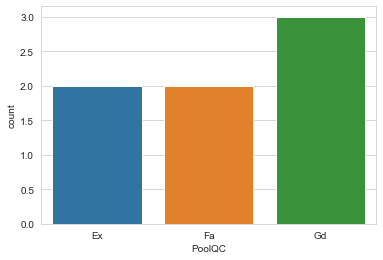

In [137]:
sns.countplot(data = df[(df['LogSalePrice'].isna() == False) & (df['PoolQC'] != 'NA')], x = 'PoolQC')

Strangely, there are no pools with a **PoolQC** value of 'TA', which is meant to denote average quality. Since there are so few pools with a **PoolQC** value not 'NA' we simply impute these missing **PoolQC** values as 'TA'.

In [138]:
df.loc[df['PoolQC'].isna(), 'PoolQC'] = 'TA'

**MiscFeature**, which indicates what sort of miscellaneous feature a house has (if any) is probably missing values due to houses not having miscellaneous features. This can be verified by **MiscVal** which indicates the value of a house's miscellaneous feature if it has one.

In [139]:
df[df['MiscFeature'].isna()]['MiscVal'].describe()

count     2814.000000
mean         6.041222
std        320.469627
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      17000.000000
Name: MiscVal, dtype: float64

Our assumption was mostly correct. For houses with a **MiscVal** value of 0 we impute a **MiscFeature** value of 'NA'.

In [140]:
# impute missin values
df.loc[(df['MiscFeature'].isna()) & (df['MiscVal'] == 0), 'MiscFeature'] = 'NA'

# see which houses are still missing MiscFeature data
df[df['MiscFeature'].isna()]['MiscVal']

Id
2550    17000
Name: MiscVal, dtype: int64

There is only one house with a miscellaneous feature without a **MiscFeature** entry and all we know is that this miscellaneous feature is valued at $17 000. The possible miscellaneous features are an elevator, a second garage, a shed, a tennis court, and others. Let's try to impute the missing value.

<AxesSubplot:xlabel='MiscFeature', ylabel='count'>

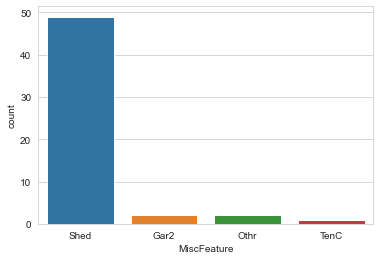

In [141]:
sns.countplot(data = df[(df['LogSalePrice'].isna() == False) & (df['MiscFeature'] != 'NA')], x = 'MiscFeature')

<AxesSubplot:xlabel='MiscFeature', ylabel='MiscVal'>

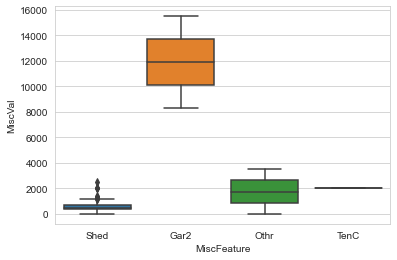

In [142]:
sns.boxplot(data = df[(df['LogSalePrice'].isna() == False) & (df['MiscFeature'] != 'NA')], x = 'MiscFeature', y = 'MiscVal')

The only miscellaneous feature with a value in the range of $17 000 is a second garage. Hence we impute the missing **MiscFeature** value as 'Gar2'.

In [143]:
df.loc[df['MiscFeature'].isna(),'MiscFeature'] = 'Gar2'

Next up we deal with the missing **Fence** values. Unlike basements, garages, fireplaces, pools, and miscellaneous features there is only one feature that pertains to fences, namely **Fence**. To impute the missing values let's first explore **Fence**.

<AxesSubplot:xlabel='Fence', ylabel='count'>

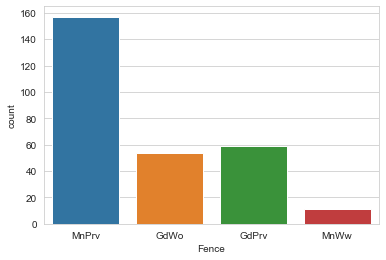

In [144]:
sns.countplot(data = train, x = 'Fence')

Curiously, there are no **Fence** values of 'NA' which are meant to indicate a house has no fence. Thus it is reasonable to assume that the houses without **Fence** values have no fence in the first place.

In [145]:
df.loc[df['Fence'].isna(), 'Fence'] = 'NA'

### Features with Very Little Missing Data

Many of our features were missing less than 1% of their data. For these features it is reasonable to impute the missing values as the most common ones.

In [146]:
little_miss = []
for col in miss_cols:
    if (df[col].isna().sum() > 0) and (df[col].isna().sum() / len(df) < 0.01):
        little_miss.append(col)
100 * df[little_miss].isna().sum() / len(df)

MSZoning       0.137033
Utilities      0.068517
Exterior1st    0.034258
Exterior2nd    0.034258
MasVnrType     0.822199
MasVnrArea     0.787941
Electrical     0.034258
KitchenQual    0.034258
Functional     0.068517
SaleType       0.034258
dtype: float64

With the exception of **MasVnrArea** the features above are discrete-valued. For such features, excluding **MasVnrType** we impute the missing values with the most common ones. Since **MasVnrType** and **MasVnrArea** are related we will deal with these two features afterwards. Let's first make sure there are indeed obvious choices for the most common value to ensure our method is reasonable.

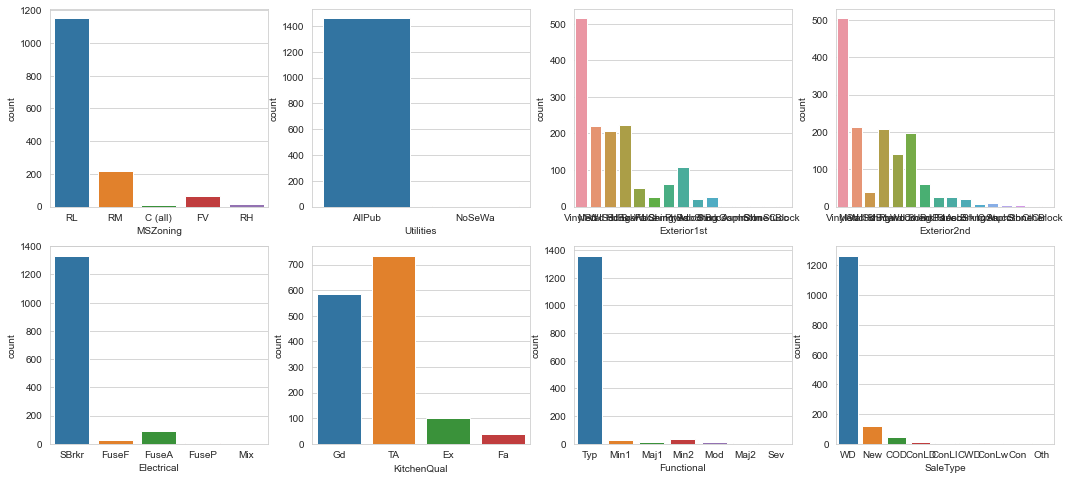

In [147]:
little_miss.remove('MasVnrType')
little_miss.remove('MasVnrArea')
plt.figure(figsize = (18, len(little_miss)))
for i in range(0, len(little_miss)):
    plt.subplot(2, 4, i + 1)
    sns.countplot(data = train, x = little_miss[i])

Generally speaking the most common value is by far the most common except possibly for **KitchenQual**. However, in this case the most common value is 'TA' which is used to denote average kitchen quality. Hence it indeed seems sensible to impute using the most common value.

In [148]:
for col in little_miss:
    df.loc[df[col].isna(), col] = train[col].mode()[0]

How shall we impute the missing **MasVnrType** and **MasVnrArea** values?

In [149]:
df[(df['MasVnrType'].isna()) | (df['MasVnrArea'].isna())][['MasVnrType', 'MasVnrArea']]

,MasVnrType,MasVnrArea
Id,,
235,NaN,NaN
530,NaN,NaN
651,NaN,NaN
937,NaN,NaN
974,NaN,NaN
978,NaN,NaN
1244,NaN,NaN
1279,NaN,NaN
1692,NaN,NaN


In all but one instance we have that the houses lacking a **MasVnrType** entry are the same houses which are missing a **MasVnrArea** entry. Let's see if it is reasonable to impute the missing **MassVnrType** entries with the most common value.

<AxesSubplot:xlabel='MasVnrType', ylabel='count'>

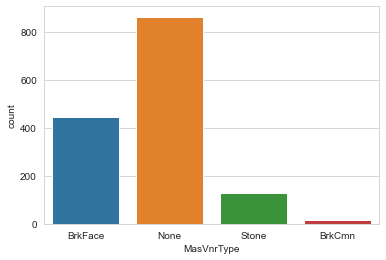

In [150]:
sns.countplot(data = train, x = 'MasVnrType')

Quite interestingly, a **MasVnrType** value of 'CBlock', used for houses with cinder block masonry veneers, never appears in the training dataset. Does it appear at all in the dataset?

In [151]:
df[df['MasVnrType'] == 'CBlock']

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LogSalePrice
Id,,,,,,,,,,,,,,,,,,,,,


We note that 'CBlock' never appears as a value for **MasVnrType** despite the dataset description stating it as a possible value. Thus it is reasonably to assume that the missing **MasVnrType** entries should correspond to 'CBlock'. We thus impute the missing **MasVnrType** entries as 'CBlock'.

In [152]:
df['MasVnrType'].fillna('CBlock', inplace = True)

Now we impute the missing **MasVnrArea** entries. To do so we first examine what correlates with this feature.

<AxesSubplot:>

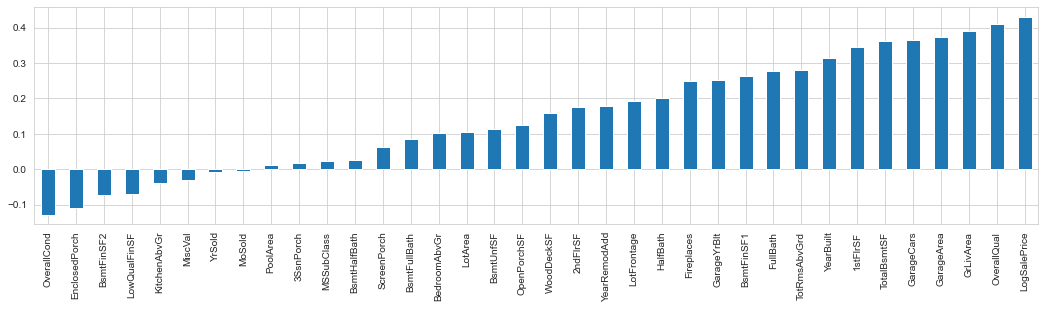

In [153]:
plt.figure(figsize = (18,4))
train.corr()['MasVnrArea'].drop('MasVnrArea').sort_values().plot(kind = 'bar')

It seems like imputing the missing **MasVnrArea** values based on **OverallQual** should provide a reasonable way to impute the missing data. Let's first take a look at **MasVnrArea**. This feature records the area of the masonry veneer in square feet. Since all the houses with missing **MasVnrArea** values actually have masonry veneers we only look at the houses with positive **MasVnrArea** values.

<AxesSubplot:xlabel='MasVnrArea', ylabel='Count'>

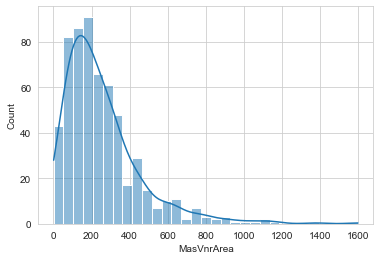

In [154]:
sns.histplot(data = train[train['MasVnrArea'] > 0], x = 'MasVnrArea', kde = True)

We impute the missing **MasVnrArea** values as follows. For each possible value of **OverallQual** we look at the subset of the training data with that corresponding **OverallQual** value with a positive **MasVnrArea** value and record the mean and standard deviation of **MasVnrArea** on this subset. Then for a house with missing **MasVnrArea** data with an **OverallQual** value of n we impute the missing value by randomly selecting a number from a normal distribution with the appropriate mean and standard deviation correspondig to n.

In [155]:
# record the means and standard deviations in a dictionary
masvnrarea_dict = dict()
for i in df['OverallQual'].values:
    curr_df = df[(df['OverallQual'] == i) & (df['MasVnrArea'] > 0)]['MasVnrArea']
    masvnrarea_dict[i] = (curr_df.mean(), curr_df.std())

# create a function to impute the missing MasVnrArea values
def masvnrarea_imputer(masvnrarea, overallqual):
    if np.isnan(masvnrarea):
        key = masvnrarea_dict[overallqual]
        return np.random.normal(loc = key[0], scale = key[1])
    else:
        return masvnrarea

# impute the missing MasVnrArea values
np.random.seed(18)
df['MasVnrArea'] = df.apply(lambda x: masvnrarea_imputer(x['MasVnrArea'], x['OverallQual']), axis = 1)

It is possible that some of our imputed values are negative.

In [156]:
df['MasVnrArea'].min()

0.0

Since all **MasVnrArea** values are nonnegative we can move on to other features with missing data.

### LotFrontage

**LotFrontage**, which measures the linear feet of street connected to a house's property, is missing nearly 17% of its values. Let's take a look at the **LotFrontage** data.

<AxesSubplot:xlabel='LotFrontage', ylabel='Count'>

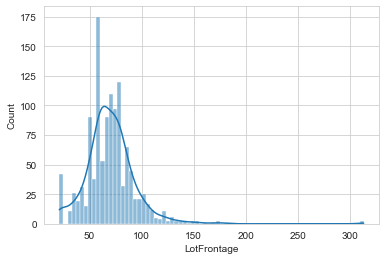

In [157]:
sns.histplot(data = train, x = 'LotFrontage', kde = True)

 To impute the missing values we take a look at what correlates with **LotFrontage**.

<AxesSubplot:>

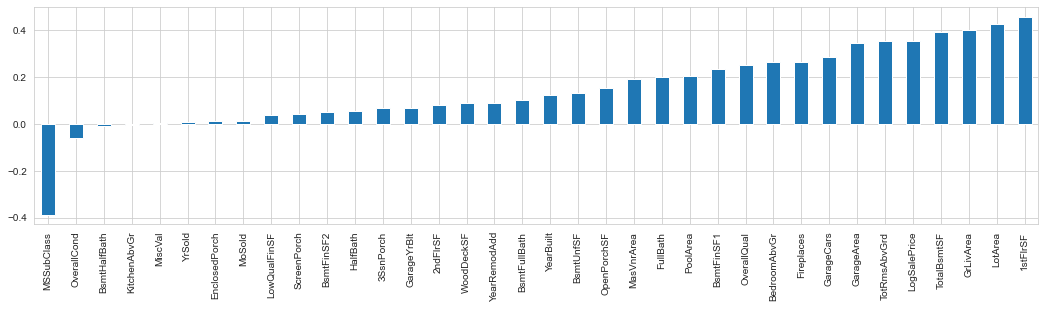

In [158]:
plt.figure(figsize = (18, 4))
train.corr()['LotFrontage'].drop('LotFrontage').sort_values().plot(kind = 'bar')

It makes sense that both **LotArea**, which measures the square footage of the lot, and **1stFlrSF**, which measures the square footage of the first floor of the house, correlate well with **LotFrontage**. Let's plot **LotFrontage** as a function of **LotArea** and **1stFlrSF**.

<AxesSubplot:xlabel='1stFlrSF', ylabel='LotFrontage'>

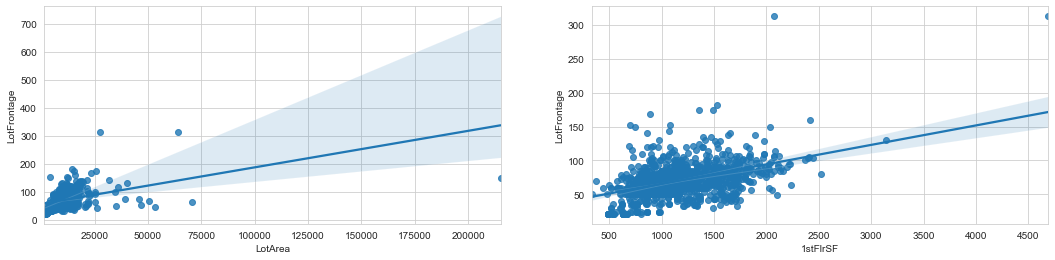

In [159]:
plt.figure(figsize = (18, 4))
plt.subplot(1, 2, 1)
sns.regplot(data = train, x = 'LotArea', y = 'LotFrontage')
plt.subplot(1, 2, 2)
sns.regplot(data = train, x = '1stFlrSF', y = 'LotFrontage')

As both **LotArea** and **1stFlrSF** measure areas and **LotFrontage** measures width it would make more sense for **LotFrontage** to correlate better with the square roots of **LotArea** and **1stFlrSF**. Let's see if this is indeed the case.

In [160]:
train['SqrtLotArea'] = train['LotArea'].apply(np.sqrt)
train['Sqrt1stFlrSF'] = train['1stFlrSF'].apply(np.sqrt)
train[['LotFrontage', 'LotArea', '1stFlrSF', 'SqrtLotArea', 'Sqrt1stFlrSF']].corr()

,LotFrontage,LotArea,1stFlrSF,SqrtLotArea,Sqrt1stFlrSF
LotFrontage,1.000000,0.426095,0.457181,0.602002,0.447168
LotArea,0.426095,1.000000,0.299475,0.909303,0.292138
1stFlrSF,0.457181,0.299475,1.000000,0.413969,0.991847
SqrtLotArea,0.602002,0.909303,0.413969,1.000000,0.414966
Sqrt1stFlrSF,0.447168,0.292138,0.991847,0.414966,1.000000


<AxesSubplot:xlabel='Sqrt1stFlrSF', ylabel='LotFrontage'>

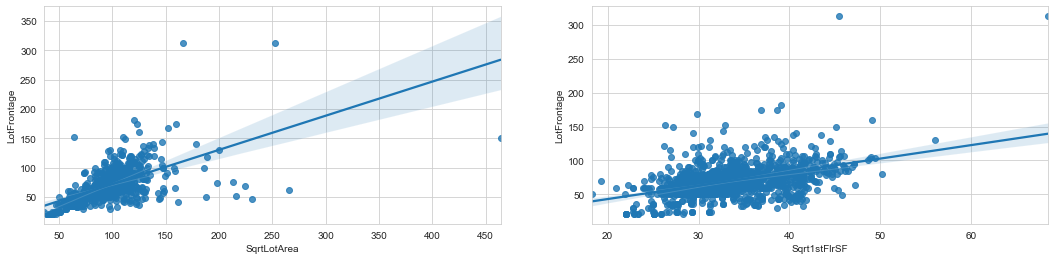

In [161]:
plt.figure(figsize = (18, 4))
plt.subplot(1, 2, 1)
sns.regplot(data = train, x = 'SqrtLotArea', y = 'LotFrontage')
plt.subplot(1, 2, 2)
sns.regplot(data = train, x = 'Sqrt1stFlrSF', y = 'LotFrontage')

Based off the above it appears sensible to use **SqrtLotArea** and **Sqrt1stFlrSF** to impute the missing **LotFrontage** values. We do so with a simple linear regression. First let's look at **SqrtLotArea** and **Sqrt1stFlrSF**.

<AxesSubplot:xlabel='Sqrt1stFlrSF', ylabel='Count'>

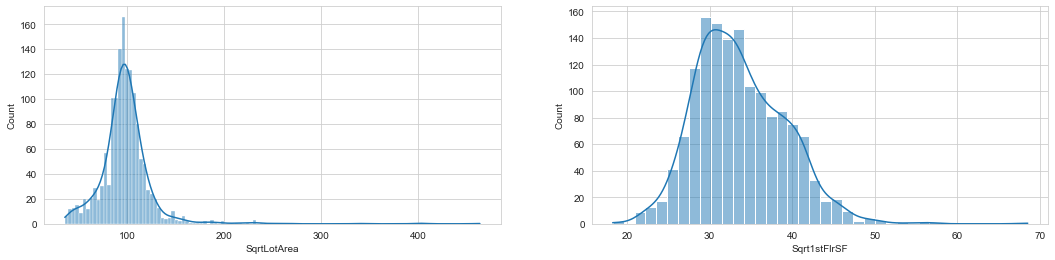

In [162]:
plt.figure(figsize = (18, 4))
plt.subplot(1, 2, 1)
sns.histplot(data = train, x = 'SqrtLotArea', kde = True)
plt.subplot(1, 2, 2)
sns.histplot(data = train, x = 'Sqrt1stFlrSF', kde = True)

Note that **SqrtLotArea**, and **Sqrt1stFlrSF** are both skewed right. We should apply a Box-Cox transformation to these two features first to mitigate the effects of skewness.

<AxesSubplot:xlabel='BoxSqrt1stFlrSF', ylabel='Count'>

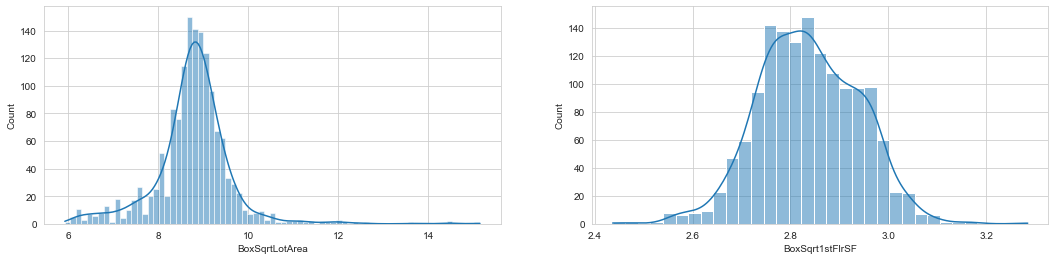

In [163]:
# add SqrtLotArea and Sqrt1stFlrSF to df
df['SqrtLotArea'] = df['LotArea'].apply(np.sqrt)
df['Sqrt1stFlrSF'] = df['1stFlrSF'].apply(np.sqrt)

# apply Box-Cox transformations
df['BoxSqrtLotArea'] = stats.boxcox(df['SqrtLotArea'])[0]
df['BoxSqrt1stFlrSF'] = stats.boxcox(df['Sqrt1stFlrSF'])[0]

# plot the transformed data
plt.figure(figsize = (18, 4))
plt.subplot(1, 2, 1)
sns.histplot(data = df[df['LogSalePrice'].isna() == False], x = 'BoxSqrtLotArea', kde = True)
plt.subplot(1, 2, 2)
sns.histplot(data = df[df['LogSalePrice'].isna() == False], x = 'BoxSqrt1stFlrSF', kde = True)

Now we perform the linear regression.

In [164]:
from sklearn.linear_model import LinearRegression

Text(0.5, 1.0, 'Imputed LotFrontage')

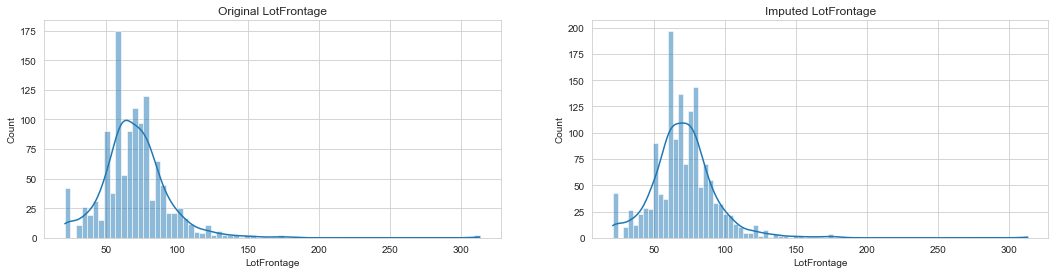

In [165]:
# create the training and test sets
lotfrontage_known = df[(df['LogSalePrice'].isna() == False) & 
                       (df['LotFrontage'].isna() == False)][['LotFrontage', 'BoxSqrtLotArea', 'BoxSqrt1stFlrSF']]
lotfrontage_unknown = df[df['LotFrontage'].isna()][['BoxSqrtLotArea', 'BoxSqrt1stFlrSF']]

# create the linear model
lm = LinearRegression()

# fit the linear model
lm.fit(X = lotfrontage_known.drop('LotFrontage', axis=1), y = lotfrontage_known['LotFrontage'])

# make predictions
df.loc[df['LotFrontage'].isna(), 'LotFrontage'] = lm.predict(lotfrontage_unknown)

# plot the original and imputed LotFrontage histograms
plt.figure(figsize = (18, 4))
plt.subplot(1, 2, 1)
sns.histplot(data = train, x = 'LotFrontage', kde = True)
plt.title('Original LotFrontage')
plt.subplot(1, 2, 2)
sns.histplot(data = df[df['LogSalePrice'].isna() == False], x = 'LotFrontage', kde = True)
plt.title('Imputed LotFrontage')

Our imputed values look quite reasonable. Let's go ahead and drop **SqrtLotArea**, **Sqrt1stFlrSF**, **BoxSqrtLotArea**, and **BoxSqrt1stFlrSF**.

In [166]:
df.drop(['SqrtLotArea', 'Sqrt1stFlrSF', 'BoxSqrtLotArea', 'BoxSqrt1stFlrSF'], axis = 1, inplace = True)

With this we no longer have any missing data.

In [167]:
df.drop('LogSalePrice', axis = 1).isna().sum().sum()

0

## Box-Cox and Logarithmic Transformations

Let's take a quick look at the histograms for our numerical data features.

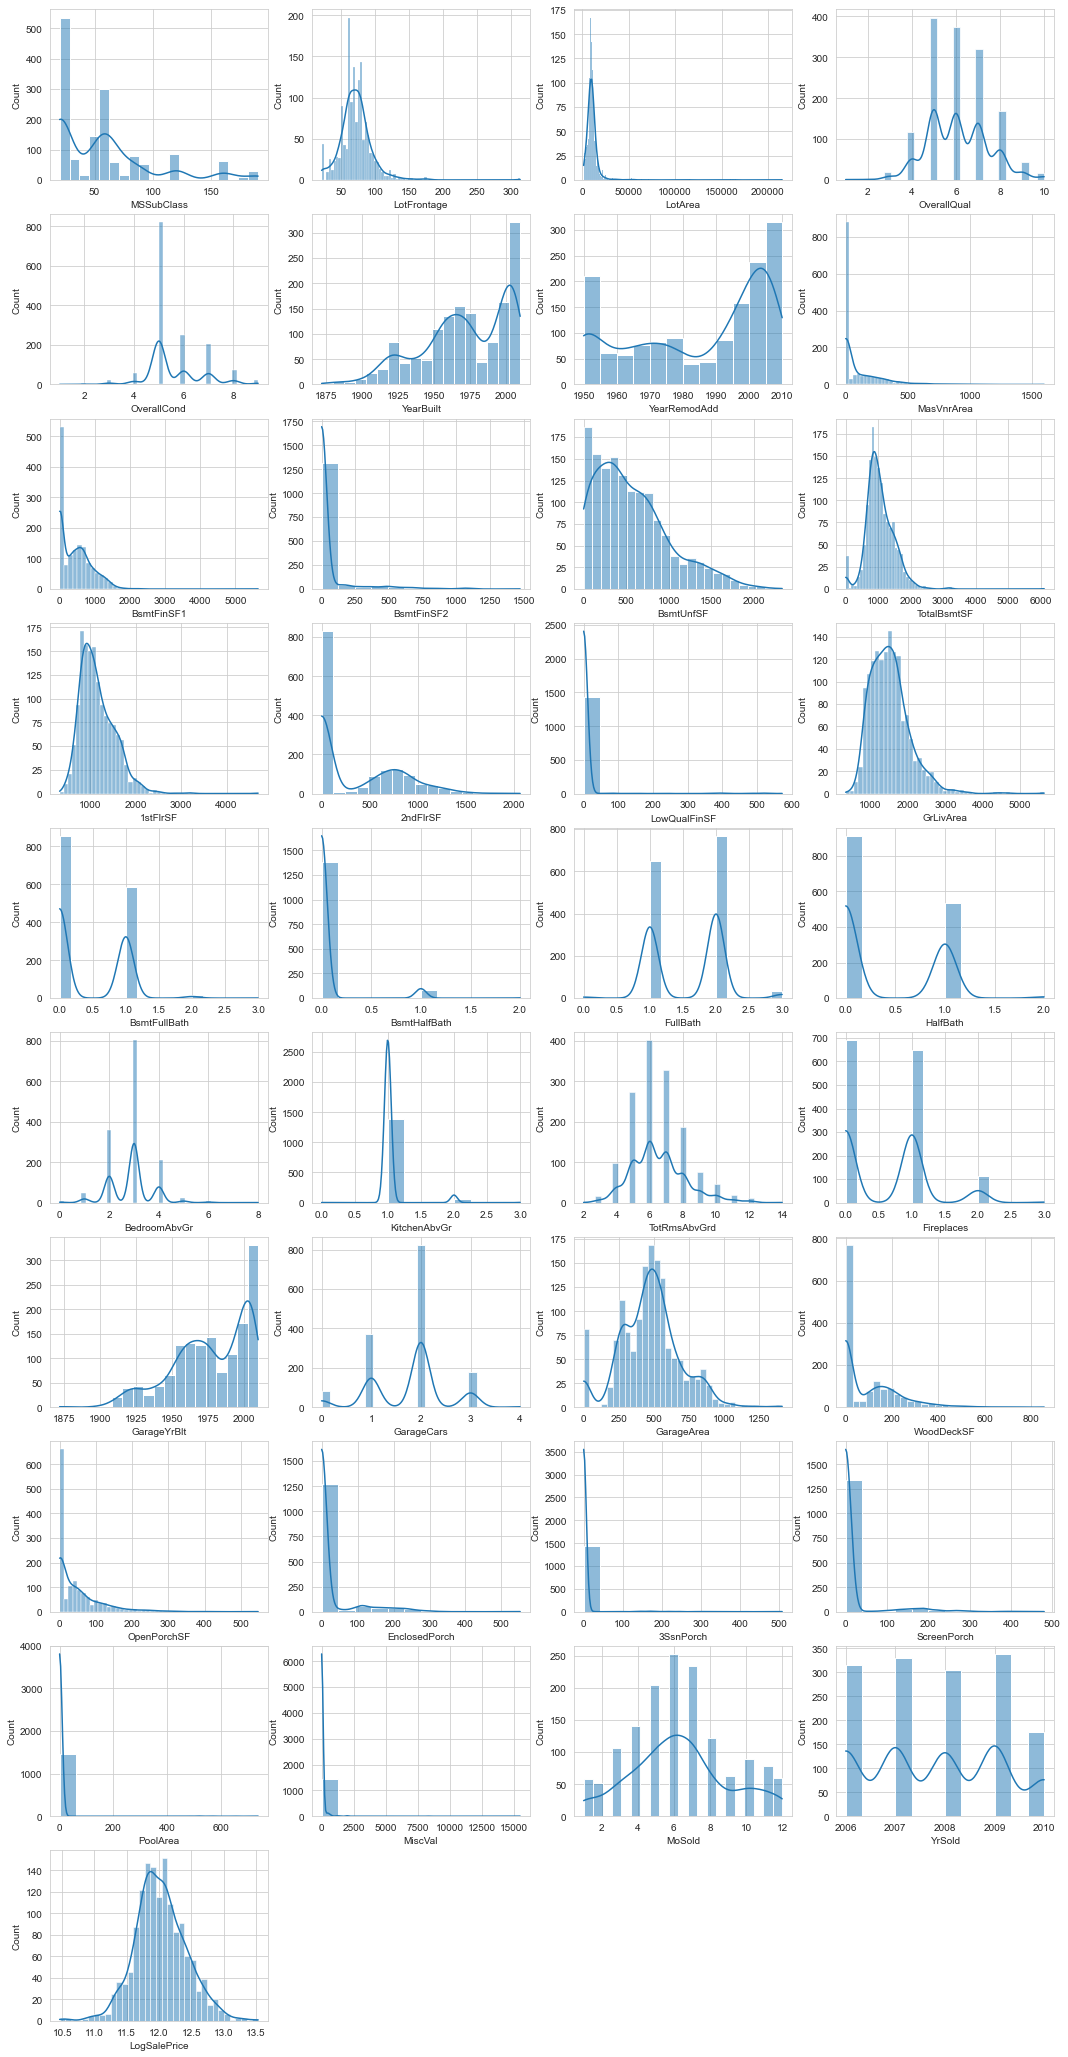

In [168]:
# record which features are numerical
numerical_feats = df.select_dtypes(include = np.number).columns

# create histograms
plt.figure(figsize = (18,len(numerical_feats)))
for i in range(0, len(numerical_feats)):
    plt.subplot(int(np.ceil(len(numerical_feats) / 4)), 4, i + 1)
    sns.histplot(data = df[df['LogSalePrice'].isna() == False], x = numerical_feats[i], kde = True)
    plt.xlabel(numerical_feats[i])

Many of our numerical features are continuously-valued. Of these, a significant portion appear roughly as normal distributions skewed right. We apply either a Box-Cox or a log1p transformation to such features. Since Box-Cox transformations require positive values, we apply Box-Cox transformations only to these features with solely positive values and log1p transformations to the rest.

In [169]:
# record the features that would benefit from a transformation
trans_feats = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
               '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
               'ScreenPorch', 'PoolArea', 'MiscVal']

# separate above features based on whether their minimum value is positive
box_feats = []
log_feats = []
for col in trans_feats:
    if train[col].min() > 0:
        box_feats.append(col)
    else:
        log_feats.append(col)

# create a dictionary to store the Box-Cox parameters in case they are needed
boxcox_dict = dict()

# apply appropriate transformations
for col in box_feats:
    df['Box' + col], boxcox_dict[col] = stats.boxcox(df[col])
for col in log_feats:
    df['Log' + col] = df[col].apply(np.log1p)

# drop the original features
df.drop(trans_feats, axis = 1, inplace = True)

## Feature Engineering

Now let's perform some feature engineering. We start with the **Condition1** feature. 

### **Condition1** and **Condition2**

Let's look at the sorts of values in **Condition1**.

In [170]:
train['Condition1'].head(10)

Id
1       Norm
2      Feedr
3       Norm
4       Norm
5       Norm
6       Norm
7       Norm
8       PosN
9     Artery
10    Artery
Name: Condition1, dtype: object

**Condition1** indicates whether the house is near any conditions of note. A value of 'Norm' means there are no exceptional conditions. Some sample values are 'Feedr', indicating proximity to a feeder street, and 'Artery', indicating proximity to an arterial street. Let's explore this feature a bit more.

<AxesSubplot:xlabel='Condition1', ylabel='count'>

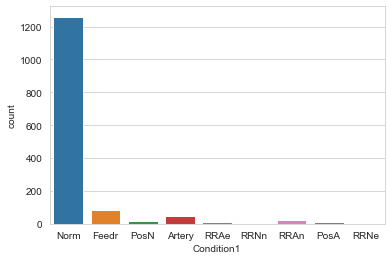

In [171]:
sns.countplot(data = train, x = 'Condition1')

The vast majority of houses do not seem to have any special conditions to record. Since the exceptional conditions appear rather infrequently it might be best to group them in some way. Let's create a boxplot of **LogSalePrice** against **Condition1**.

<AxesSubplot:xlabel='Condition1', ylabel='LogSalePrice'>

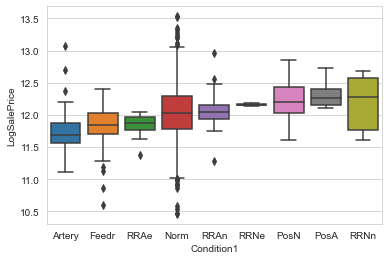

In [172]:
sns.boxplot(data = train, x = 'Condition1', y = 'LogSalePrice',
            order = train.groupby('Condition1')['LogSalePrice'].median().sort_values().index)

In [173]:
train.groupby('Condition1')['LogSalePrice'].median().sort_values()

Condition1
Artery    11.691486
Feedr     11.849398
RRAe      11.867097
Norm      12.022746
RRAn      12.052271
RRNe      12.158526
PosN      12.206073
PosA      12.261060
RRNn      12.273731
Name: LogSalePrice, dtype: float64

The values 'Artery', 'Feedr', and 'Norm' were dicussed above. A value of 'RRAe' or 'RRAn' means a house is adjacent to a railroad and the railroad runs either east-west or north-south, respectively. Values of 'RRNe' and 'RRNn' means a house is not quite adjacent to a railroad but it is within 200 feet of a railroad running east-west or north-south, respectively. The values 'PosN' and 'PosA' mean a house is either near or adjacent to a positive feature, like a park or greenbelt.

If we take the lack of a condition as the baseline, then it looks like being near and arterial or feeder street negatively impacts sale price while being adjacent to a railroad has no effect. On the other hand, being near a railroad seems to positively affect sale price, as does being near/adjacent to a positive feature. Thus we shall replace the negative conditions with 0, neutral conditions with 1, and positive conditions with 2.

<AxesSubplot:xlabel='Condition1', ylabel='LogSalePrice'>

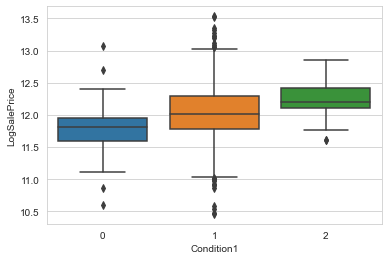

In [174]:
df['Condition1'].replace(['Artery', 'Feedr'], 0, inplace = True)
df['Condition1'].replace(['Norm', 'RRAe', 'RRAn'], 1, inplace = True)
df['Condition1'].replace(['RRNe', 'RRNn', 'PosN', 'PosA'], 2, inplace = True)
sns.boxplot(data = df, x = 'Condition1', y = 'LogSalePrice')

If a house has a second condition to note it is recorded in **Condition2**. Let's take a look at **Condition2**.

<AxesSubplot:xlabel='Condition2', ylabel='count'>

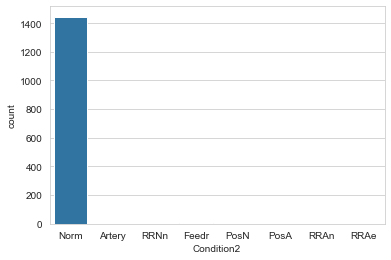

In [175]:
sns.countplot(data = train, x = 'Condition2')

In [176]:
train['Condition2'].value_counts()

Norm      1445
Feedr        6
PosN         2
RRNn         2
Artery       2
RRAn         1
RRAe         1
PosA         1
Name: Condition2, dtype: int64

We proceed as we did for **Condition1**.

<AxesSubplot:xlabel='Condition2', ylabel='LogSalePrice'>

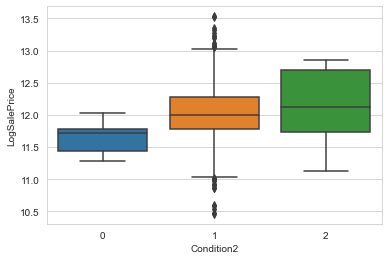

In [177]:
df['Condition2'].replace(['Artery', 'Feedr'], 0, inplace = True)
df['Condition2'].replace(['Norm', 'RRAe', 'RRAn'], 1, inplace = True)
df['Condition2'].replace(['RRNe', 'RRNn', 'PosN', 'PosA'], 2, inplace = True)
sns.boxplot(data = df, x = 'Condition2', y = 'LogSalePrice')

Rather than have two separate condition features it might be worthwhile to sum **Condition1** and **Condition2** to create a new feature **Conditions**. Then a **Conditions** value of 2 would represent the typical house with values below 2 indicating proximity to negative features and values above 2 indicating proximity to positive features.

<AxesSubplot:xlabel='Conditions', ylabel='LogSalePrice'>

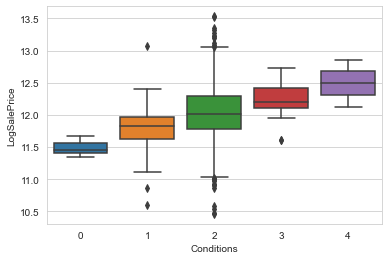

In [178]:
df['Conditions'] = df['Condition1'] + df['Condition2']
sns.boxplot(data = df, x = 'Conditions', y = 'LogSalePrice')

In [179]:
df[df['LogSalePrice'].isna() == False][['LogSalePrice', 'Condition1', 'Condition2', 'Conditions']].corr()

,LogSalePrice,Condition1,Condition2,Conditions
LogSalePrice,1.000000,0.196702,0.062878,0.205448
Condition1,0.196702,1.000000,0.017829,0.961366
Condition2,0.062878,0.017829,1.000000,0.292371
Conditions,0.205448,0.961366,0.292371,1.000000


The **Conditions** feature correlates better with **LogSalePrice** than **Condition1** and **Condition2** so we will keep this feature. Let's drop **Condition1** and **Condition2**.

In [180]:
df.drop(['Condition1', 'Condition2'], axis = 1, inplace = True)

### Existence of Basements, Second Floors, Garages, Pools, Miscellaneous Features, Alleys, and Fences

Currently our dataset does not have any features which indicate whether a house has a basement, a second floor, a garage, a pool, a miscellaneous feature like a shed or tennis court, alley access, or a fence. However, we can easily engineer such features using **LogTotalBsmtSF**, **Log2ndFlrSF**, **LogGarageArea**, **LogPoolArea**, **LogMiscVal**, **Alley**, and **Fence**, respectively. The first four features measure the square footage (after a log1p transformation) of a house's basement, second floor, garage, and pool, respectively, whereas **LogMiscVal** records the value (again after a log1p transformation) of a house's miscellaneous feature. Therefore, whether or not these values are zero precisely determine whether or not a house has the corresponding feature. In addition, a value of 'NA' in either **Alley** or **Fence** indicates the lack of alley access or fence, respectively. Thus we can use this to create a feature stating whether or not a house has alley access or a fence. 

Let's explore these features a bit first.

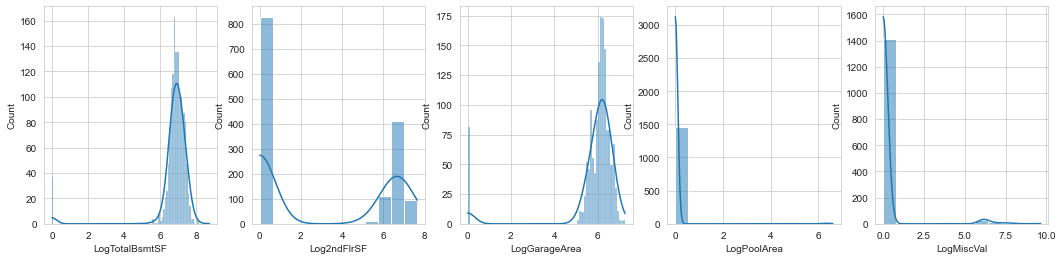

In [181]:
# create a list correpsonding to the numerical features above
has_feats_num = ['LogTotalBsmtSF', 'Log2ndFlrSF', 'LogGarageArea', 'LogPoolArea', 'LogMiscVal']

# create histograms
plt.figure(figsize = (18, 4))
for i in range(0, len(has_feats_num)):
    plt.subplot(1, 5, i + 1)
    sns.histplot(data = df[df['LogSalePrice'].isna() == False], x = has_feats_num[i], kde = True)

<AxesSubplot:xlabel='Fence', ylabel='count'>

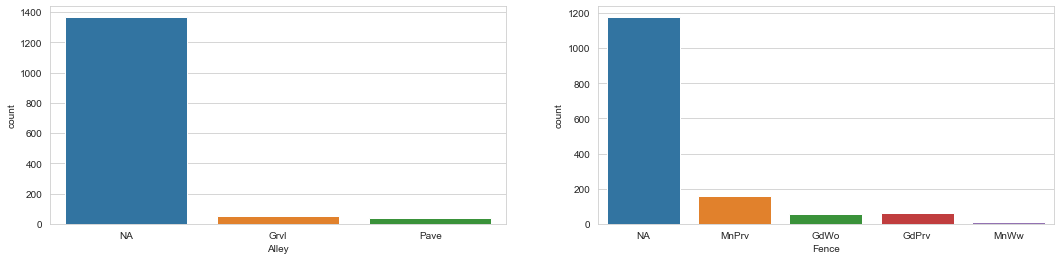

In [182]:
# create a list corresponding to the categorical features above
has_feats_cat = ['Alley', 'Fence']

# create countplots
plt.figure(figsize = (18, 4))
plt.subplot(1, 2, 1)
sns.countplot(data = df[df['LogSalePrice'].isna() == False], x = 'Alley')
plt.subplot(1, 2, 2)
sns.countplot(data = df[df['LogSalePrice'].isna() == False], x = 'Fence')

It looks like a very small minority of houses have pools or miscellaneous features. Thus knowing whether a house has a pool/miscellaneous feature may not be that useful in predicting **LogSalePrice**.

Let's go ahead and create the aforementioned features now.

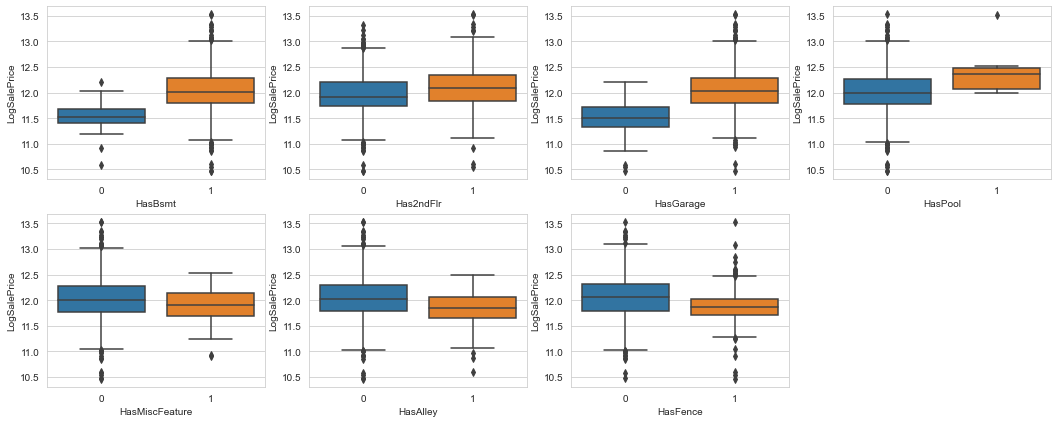

In [183]:
# create a list to use as the new feature names
new_has_feats = ['HasBsmt', 'Has2ndFlr', 'HasGarage', 'HasPool', 'HasMiscFeature', 'HasAlley', 'HasFence']

# create the features and box plots of LogSalePrice against these features
plt.figure(figsize = (18, len(new_has_feats)))
for i in range(0, len(has_feats_num)):
    df[new_has_feats[i]] = df[has_feats_num[i]].apply(lambda x: 1 * (x > 0))
    plt.subplot(int(np.ceil(len(new_has_feats) / 4)), 4, i + 1)
    sns.boxplot(data = df[df['LogSalePrice'].isna() == False], x = new_has_feats[i], y = 'LogSalePrice')
for j in range(0,len(has_feats_cat)):
    df[new_has_feats[j + len(has_feats_num)]] = df[has_feats_cat[j]].apply(lambda x: 1 * (x != 'NA'))
    plt.subplot(int(np.ceil(len(new_has_feats) / 4)), 4, j + 1 + len(has_feats_num))
    sns.boxplot(data = df[df['LogSalePrice'].isna() == False], x = new_has_feats[j + len(has_feats_num)], y = 'LogSalePrice')

Based on the box plots above these features seem worth keeping.

### Bathroom Features and **TotRmsAbvGrd**

There are four features which relate to bathrooms: **BsmtFullBath**, **BsmtHalfBath**, **FullBath**, and **HalfBath**. The first two record the number of full bathrooms and half bathrooms, respectively, a house has in their basement. The latter two features do the same for the above grade bathrooms.

The sum of **BsmtFullBath** and **FullBath** yields the total number of full bathrooms in a house. In a similar fashion, the sum of **BsmtHalfBath** and **HalfBath** yields the total number of half bathrooms in a house. We can then determine the total number of bathrooms in a house, weighing half bathrooms half as much as full bathrooms.

<AxesSubplot:xlabel='TotBaths', ylabel='LogSalePrice'>

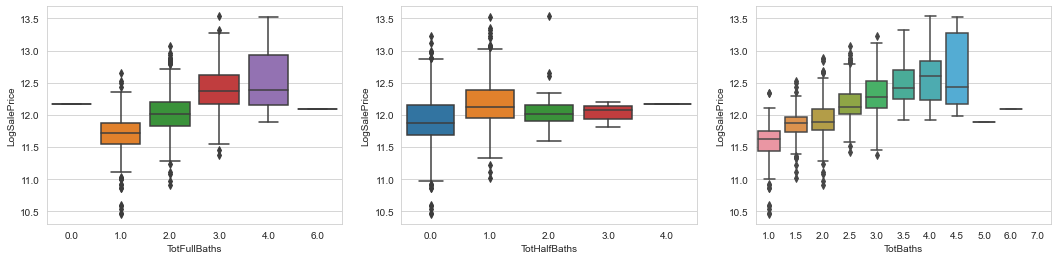

In [184]:
# create the aforementioned features
df['TotFullBaths'] = df['BsmtFullBath'] + df['FullBath']
df['TotHalfBaths'] = df['BsmtHalfBath'] + df['HalfBath']
df['TotBaths'] = df['TotFullBaths'] + df['TotHalfBaths'] / 2

# plot boxplots of LogSalePrice against the above features
plt.figure(figsize = (18, 4))
plt.subplot(1, 3, 1)
sns.boxplot(data = df, x = 'TotFullBaths', y = 'LogSalePrice')
plt.subplot(1, 3, 2)
sns.boxplot(data = df, x = 'TotHalfBaths', y = 'LogSalePrice')
plt.subplot(1, 3, 3)
sns.boxplot(data = df, x = 'TotBaths', y = 'LogSalePrice')

In [185]:
df[df['LogSalePrice'].isna() == False][['LogSalePrice', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'TotFullBaths',
                                    'TotHalfBaths', 'TotBaths']].corr()

,LogSalePrice,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,TotFullBaths,TotHalfBaths,TotBaths
LogSalePrice,1.000000,0.236224,-0.005149,0.594771,0.313982,0.615054,0.282786,0.673011
BsmtFullBath,0.236224,1.000000,-0.147871,-0.064512,-0.030905,0.660300,-0.091778,0.583076
BsmtHalfBath,-0.005149,-0.147871,1.000000,-0.054536,-0.012340,-0.145860,0.419748,0.012092
FullBath,0.594771,-0.064512,-0.054536,1.000000,0.136381,0.706840,0.100292,0.694197
HalfBath,0.313982,-0.030905,-0.012340,0.136381,1.000000,0.080729,0.902392,0.393516
TotFullBaths,0.615054,0.660300,-0.145860,0.706840,0.080729,1.000000,0.010420,0.935745
TotHalfBaths,0.282786,-0.091778,0.419748,0.100292,0.902392,0.010420,1.000000,0.362409
TotBaths,0.673011,0.583076,0.012092,0.694197,0.393516,0.935745,0.362409,1.000000


As expected, **LogSalePrice** correlates quite well with **TotBaths**.

Before we drop the bathroom features that are not **TotBaths**, we note that the dataset contains a feature called **TotRmsAbvGrd** which records the number of above grade rooms, excluding bathrooms. If we want the total number of above grade rooms then we should add **FullBath** and **HalfBath** to this feature.

<AxesSubplot:xlabel='TotRms', ylabel='LogSalePrice'>

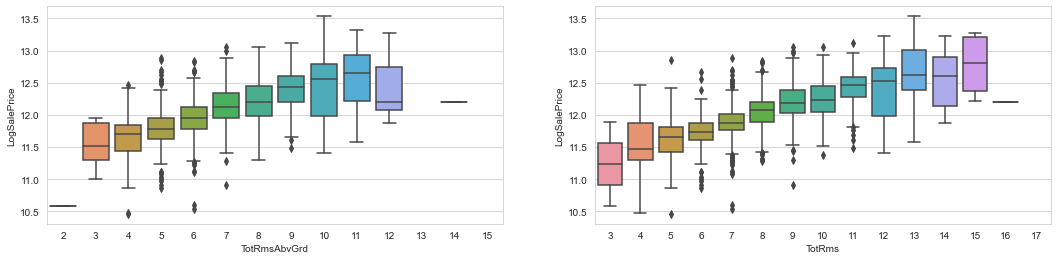

In [186]:
# create a TotRms feature
df['TotRms'] = df['TotRmsAbvGrd'] + df['FullBath']

# plot boxplots of LogSalePrice against TotRmsAbvGrd and TotRms
plt.figure(figsize = (18, 4))
plt.subplot(1, 2, 1)
sns.boxplot(data = df, x = 'TotRmsAbvGrd', y = 'LogSalePrice')
plt.subplot(1, 2, 2)
sns.boxplot(data = df, x = 'TotRms', y = 'LogSalePrice')

In [187]:
df[df['LogSalePrice'].isna() == False][['LogSalePrice', 'TotRmsAbvGrd', 'TotRms']].corr()

,LogSalePrice,TotRmsAbvGrd,TotRms
LogSalePrice,1.000000,0.534422,0.602773
TotRmsAbvGrd,0.534422,1.000000,0.972966
TotRms,0.602773,0.972966,1.000000


As we can see, the engineered **TotRms** feature appears to correlate better with **TotRmsAbvGrd**. We now drop the non-**TotBaths** bathroom features as well as **TotRmsAbvGrd**.

In [188]:
df.drop(['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'TotFullBaths', 'TotHalfBaths', 'TotRmsAbvGrd'], axis = 1, 
        inplace = True)

### Deck/Porch Features

We have five features which pertain to a house's deck/porch: **LogWoodDeckSF**, **LogOpenPorchSF**, **LogEnclosedPorch**, **Log3SsnPorch**, and **LogScreenPorch**. These features record the square footage (after a log1p transformation) of a house's wooden deck, open porch, enclosed porch, three season porch, and/or screen porch, respectively. From these features we can determine the total square footage of deck/porch space a house has, as well as the type of deck/porch.

Let's first take a look at the data.

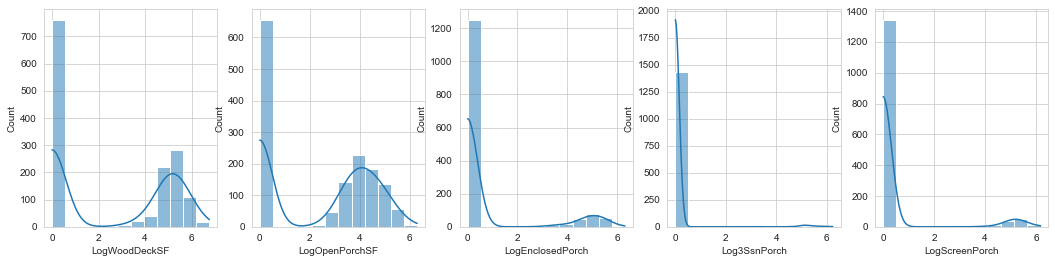

In [189]:
# create a list of porch-related features
porches = ['LogWoodDeckSF', 'LogOpenPorchSF', 'LogEnclosedPorch', 'Log3SsnPorch', 'LogScreenPorch']

# create histograms of the porch features
plt.figure(figsize = (18, 4))
for i in range(0, len(porches)):
    plt.subplot(1, 5, i + 1)
    sns.histplot(data = df[df['LogSalePrice'].isna() == False], x = porches[i], kde = True)

It looks like enclosed porches, three season porches, and screen porches are fairly rare. As such the features we engineer from them may not prove to be that fruitful.

Let's engineer whether a house has each of the five deck/porch types.

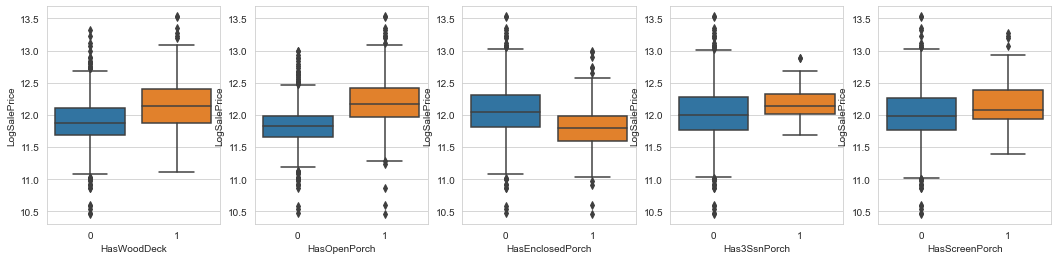

In [190]:
# create a list of new feature names for the porch features
has_porches=['HasWoodDeck','HasOpenPorch','HasEnclosedPorch','Has3SsnPorch','HasScreenPorch']

# create the above features as well as box plots of LogSalePrice against these features
plt.figure(figsize = (18, 4))
for i in range(0, len(porches)):
    df[has_porches[i]] = df[porches[i]].apply(lambda x: 1 * (x > 0))
    plt.subplot(1, 5, i + 1)
    sns.boxplot(data = df[df['LogSalePrice'].isna() == False], x = has_porches[i] , y = 'LogSalePrice')

In [191]:
df[df['LogSalePrice'].isna() == False][['LogSalePrice'] + has_porches].corr()

,LogSalePrice,HasWoodDeck,HasOpenPorch,HasEnclosedPorch,Has3SsnPorch,HasScreenPorch
LogSalePrice,1.000000,0.320349,0.449220,-0.216559,0.057857,0.099436
HasWoodDeck,0.320349,1.000000,0.143529,-0.163121,-0.016071,-0.088910
HasOpenPorch,0.449220,0.143529,1.000000,-0.195172,0.019314,-0.004478
HasEnclosedPorch,-0.216559,-0.163121,-0.195172,1.000000,-0.037282,-0.076270
Has3SsnPorch,0.057857,-0.016071,0.019314,-0.037282,1.000000,-0.037980
HasScreenPorch,0.099436,-0.088910,-0.004478,-0.076270,-0.037980,1.000000


It looks like **HasWoodDeck**, **HasOpenPorch**, and **HasEnclosedPorch** correlate decently with **LogSalePrice** but **Has3SsnPorch** and **HasScreenPorch** have much weaker correlations. Despite this we shall keep these features as the box plots do seem to indicate that they convey some useful information.

Is it useful to know if a house even has a deck/porch?

<AxesSubplot:xlabel='HasPorch', ylabel='count'>

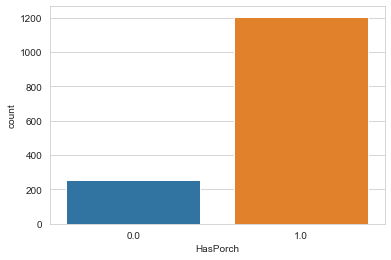

In [192]:
# record whether a house has a deck/porch
df['HasPorch'] = np.ceil((df['HasWoodDeck'] + df['HasOpenPorch'] + df['HasEnclosedPorch'] + df['Has3SsnPorch']
                          + df['HasScreenPorch']) / 5)

# create a count plot of HasPorch
sns.countplot(data = df[df['LogSalePrice'].isna() == False], x = 'HasPorch')

<AxesSubplot:xlabel='HasPorch', ylabel='LogSalePrice'>

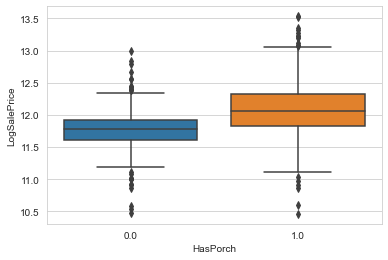

In [193]:
sns.boxplot(data = df[df['LogSalePrice'].isna() == False], x = 'HasPorch', y = 'LogSalePrice')

It seems like knowing whether a house has a deck/porch can be useful in predicting sale price.

Now let's determine the total square footage of deck/porch space a house has.

In [194]:
# undo the log1p transformations
for col in porches:
    df[col[3:]] = df[col].apply(np.expm1)

# sum to obtain the total square footage
df['PorchSF'] = df[[col[3:] for col in porches]].sum(axis = 1)

# apply a log1p transformation to the total square footage
df['LogPorchSF'] = df['PorchSF'].apply(np.log1p)

# drop the unnecessary features
df.drop([col[3:] for col in porches] + ['PorchSF'], axis = 1, inplace = True)

How useful is **LogPorchSF**?

In [195]:
df[df['LogSalePrice'].isna() == False][['LogSalePrice'] + porches + ['LogPorchSF']].corr()

,LogSalePrice,LogWoodDeckSF,LogOpenPorchSF,LogEnclosedPorch,Log3SsnPorch,LogScreenPorch,LogPorchSF
LogSalePrice,1.000000,0.343039,0.459948,-0.207263,0.058827,0.105858,0.375169
LogWoodDeckSF,0.343039,1.000000,0.135101,-0.165196,-0.023906,-0.090818,0.577688
LogOpenPorchSF,0.459948,0.135101,1.000000,-0.183566,0.020346,0.004416,0.493056
LogEnclosedPorch,-0.207263,-0.165196,-0.183566,1.000000,-0.038943,-0.082423,0.211331
Log3SsnPorch,0.058827,-0.023906,0.020346,-0.038943,1.000000,-0.037627,0.090368
LogScreenPorch,0.105858,-0.090818,0.004416,-0.082423,-0.037627,1.000000,0.197030
LogPorchSF,0.375169,0.577688,0.493056,0.211331,0.090368,0.197030,1.000000


The correlation between **LogSalePrice** and **LogPorchSF** is quite decent and so we keep **LogPorchSF**.

### Categorical Features

The last bit of feature engineering that we need to do is to convert categorical features into data that our machine learning algorithms can use. We create a list of our categorical features.

In [196]:
cat_feats = df.select_dtypes(exclude = np.number).columns

A closer look at our features reveals that **MSSubClass**, a seemingly numerical feature, is actually categorical.

In [197]:
train['MSSubClass'].head(10)

Id
1      60
2      20
3      60
4      70
5      60
6      50
7      20
8      60
9      50
10    190
Name: MSSubClass, dtype: int64

The information stored in **MSSubClass** is the dwelling type of the house and this data is recorded via numeric codes. For example, a value of 60 indicates the house is a two story dwelling constructed after 1945.

The data in **MSSubClass** consists of the number of floors in a given house as well as its age. This information can be found in other features, namely **HouseStyle** and **YearBuilt**.

In [198]:
train['HouseStyle'].head()

Id
1    2Story
2    1Story
3    2Story
4    2Story
5    2Story
Name: HouseStyle, dtype: object

In [199]:
train['YearBuilt'].head()

Id
1    2003
2    1976
3    2001
4    1915
5    2000
Name: YearBuilt, dtype: int64

Hence we may drop **MSSubClass**.

In [200]:
df.drop('MSSubClass', axis = 1, inplace = True)

How shall we handle our other categorical features? We will implement two methods: label encoding and one-hot encoding. To determine which method we should use for a given categorical feature, let's first explore these features a bit. We begin with box plots of **LogSalePrice** against our categorical features.

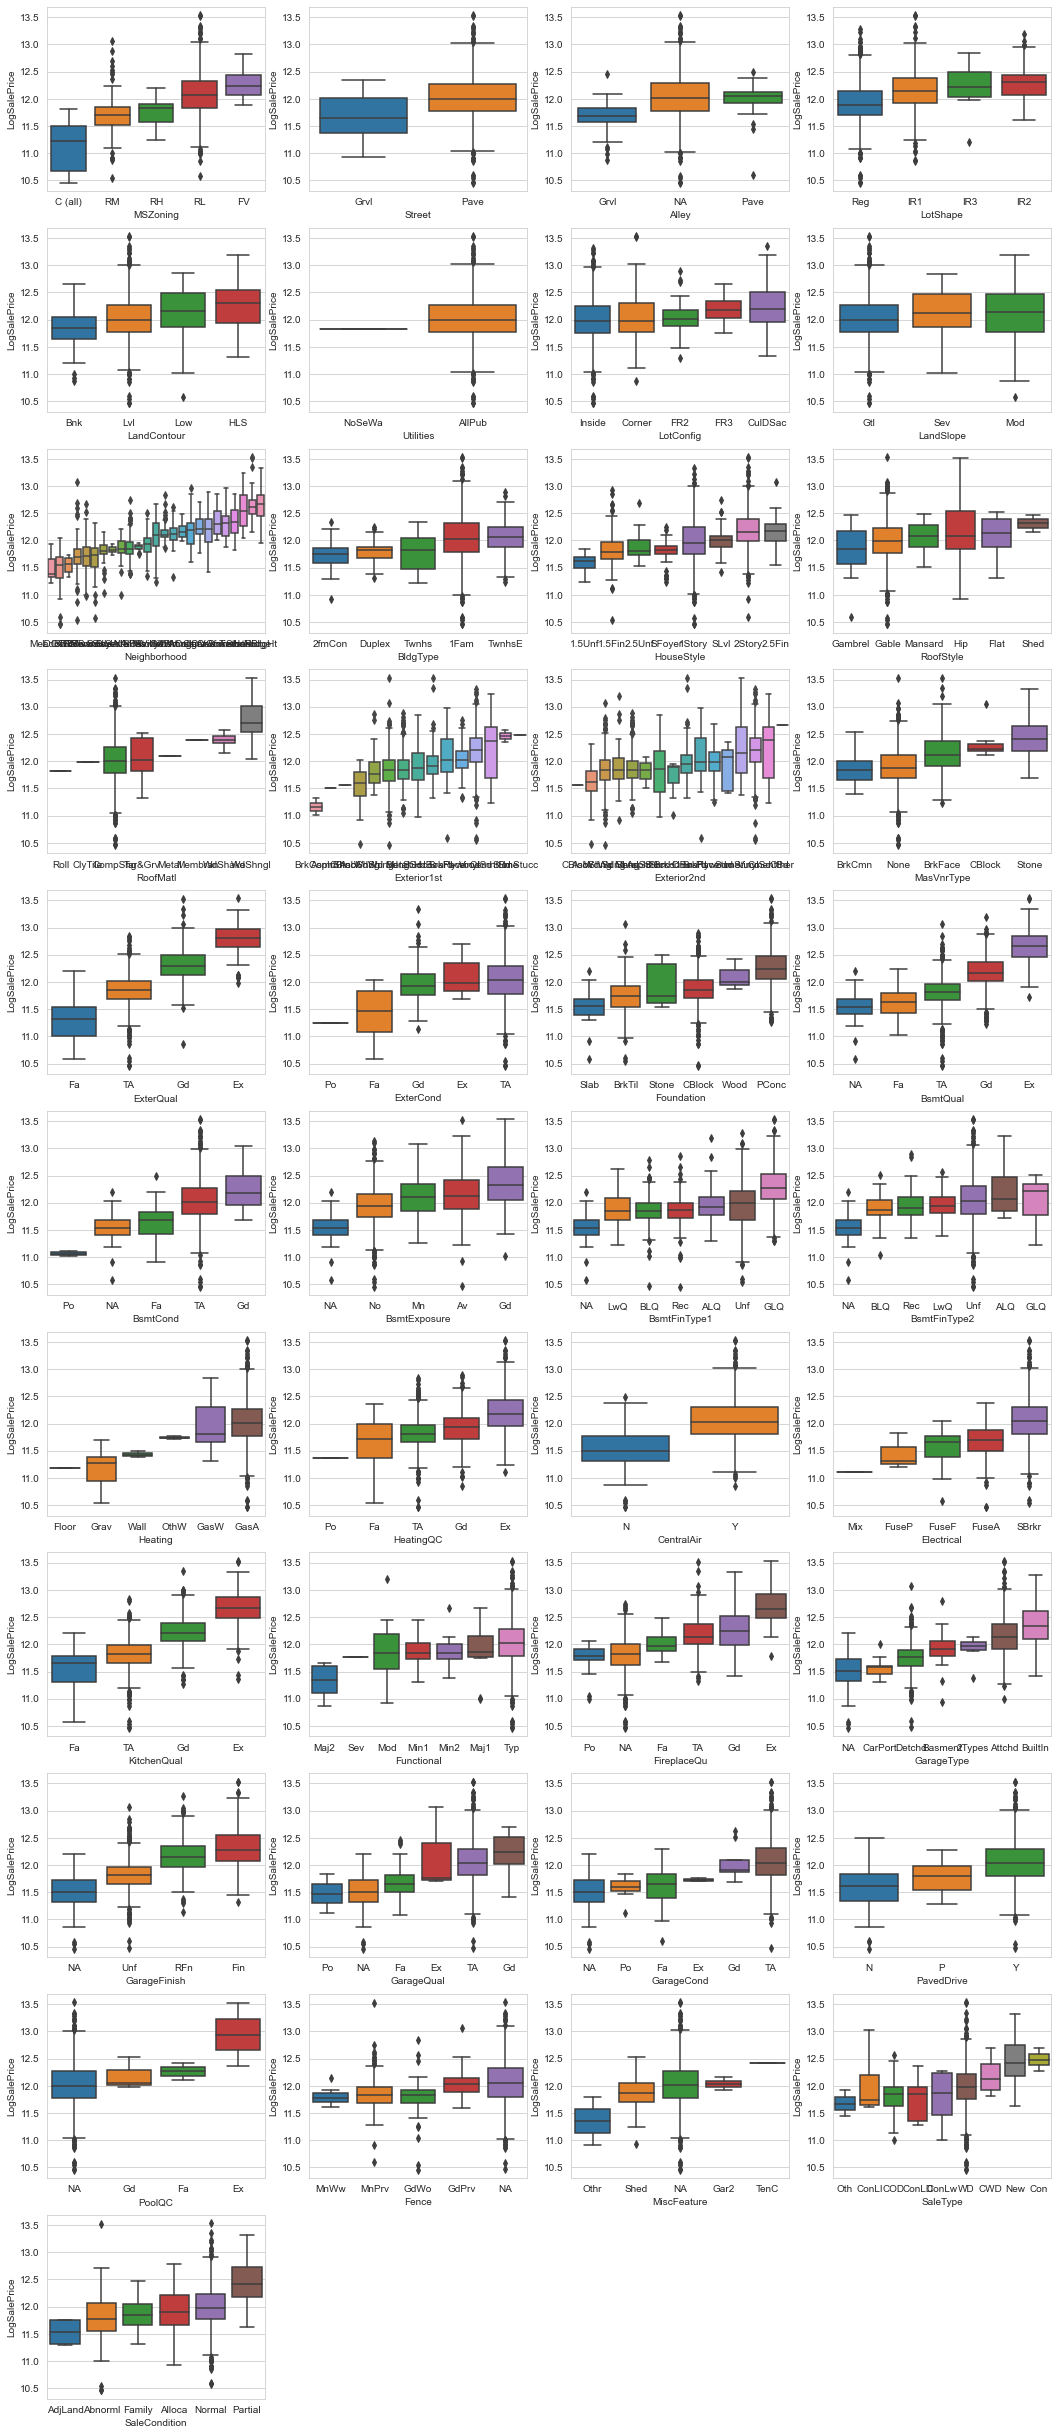

In [201]:
plt.figure(figsize = (18,44))
for i in range(0, len(cat_feats)):
    plt.subplot(int(np.ceil(len(cat_feats) / 4)), 4, i + 1)
    sns.boxplot(data = df[df['LogSalePrice'].isna() == False], x = cat_feats[i], y = 'LogSalePrice',
               order = df[df['LogSalePrice'].isna() == False].groupby(cat_feats[i])['LogSalePrice'].median().sort_values().index)

### Categorical Features - Label Encoding

**LotShape** describes the general shape of the property and takes values 'Reg', 'IR1', 'IR2', and 'IR3'. Houses represented by 'Reg' have properties with regular shape. By contrast, those with values of 'IR1' 'IR2', or 'IR3' have irregularly shaped properties, with 'IR1' denoting slight irregularity, 'IR2' denoting moderate irregularity, and 'IR3' representing the most irregularly shaped properties.

The box plot above corresponding to **LotShape** shows a general trend of increasing sale price as a house's property becomes increasingly irregular in shape. As such we label encode **LotShape**. 

In [202]:
df.replace({'Reg' : 0, 'IR1' : 1, 'IR2' : 2, 'IR3' : 3}, inplace = True)

Note that there are several features, such as **ExterQual** and **ExterCond**, that take on values 'NA', 'Po', 'Fa', 'TA', 'Gd', and 'Ex'. Such values represent 'not available', 'poor', 'fair', 'typical/average', 'good', and 'excellent', respectively. These features rate various aspects of the house, e.g. **ExterQual** evaluates the quality of the material of the house's exterior. Consequently, these sorts of features are well-suited for label encoding.

In [203]:
# record the features taking values 'Po', 'Fa', 'TA', 'Gd', and/or 'Ex'
NAPoFaTAGdEx = []

for col in cat_feats:
    if 'Fa' in df[df['LogSalePrice'].isna() == False][col].values:
        NAPoFaTAGdEx.append(col)

# replace values by integers
for col in NAPoFaTAGdEx:
    df[col].replace({'NA' : 0, 'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5}, inplace = True)

<ipython-input-203-9ca01b28523d>:5: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'Fa' in df[df['LogSalePrice'].isna() == False][col].values:


A similar situation arises for **BsmtExposure**. This feature evaluates a house's walkout or garden level basement walls. The possible values this feature takes are 'NA', 'No', 'Mn' , 'Av', and 'Gd', representing no basement, no exposure, minimum exposure, average exposure, and good exposure, respectively. The box plot pertaining to **BsmtExposure** suggests this feature would benefit from label encoding.

In [204]:
df['BsmtExposure'].replace({'NA' : 0, 'No' : 1, 'Mn' : 2, 'Av' : 3, 'Gd' : 4}, inplace = True)

**Functional** records a house's functionality. A value of 'Typ' means a house has typical functionality. A value of 'Min1' or 'Min2' indicates a house has level 1 or level 2 minor deductions, respectively. In increasing order of severity the remaining possible values for **Functional** are 'Mod' (moderate deductions), 'Maj1' and 'Maj2' (level 1 or level 2 major deductions), 'Sev' (house severely damaged), and 'Sal' (house is salvage only). We label encode **Functional**.

In [205]:
df['Functional'].replace({'Sal' : 0, 'Sev' : 1, 'Maj2' : 2, 'Maj1' : 3, 'Mod' : 4, 'Min2' : 5, 'Min1' : 6, 'Typ' : 7},
                         inplace = True)

**GarageFinish** evaluates the interior finish of a house's garage. Possible values are 'NA', 'Unf', 'RFn', and 'Fin', representing no garage, an unfinished interor, a roughly finished interior, and a finished interior, respectively. We label encode this feature.

In [206]:
df['GarageFinish'].replace({'NA' : 0, 'Unf' : 1, 'RFn' : 2, 'Fin' : 3}, inplace = True)

Label encoding is also optimal for **PavedDrive**. This features records whether a house has a paved driveway, using 'N' to represent 'no', 'P' to denote 'partially', and 'Y' to signify 'yes'.

In [207]:
df['PavedDrive'].replace({'N' : 0, 'P' : 1, 'Y' : 2}, inplace = True)

### Categorical Features - One-Hot Encoding

We one-hot encode our remaining categorical features. Let's first create count plots of these features.

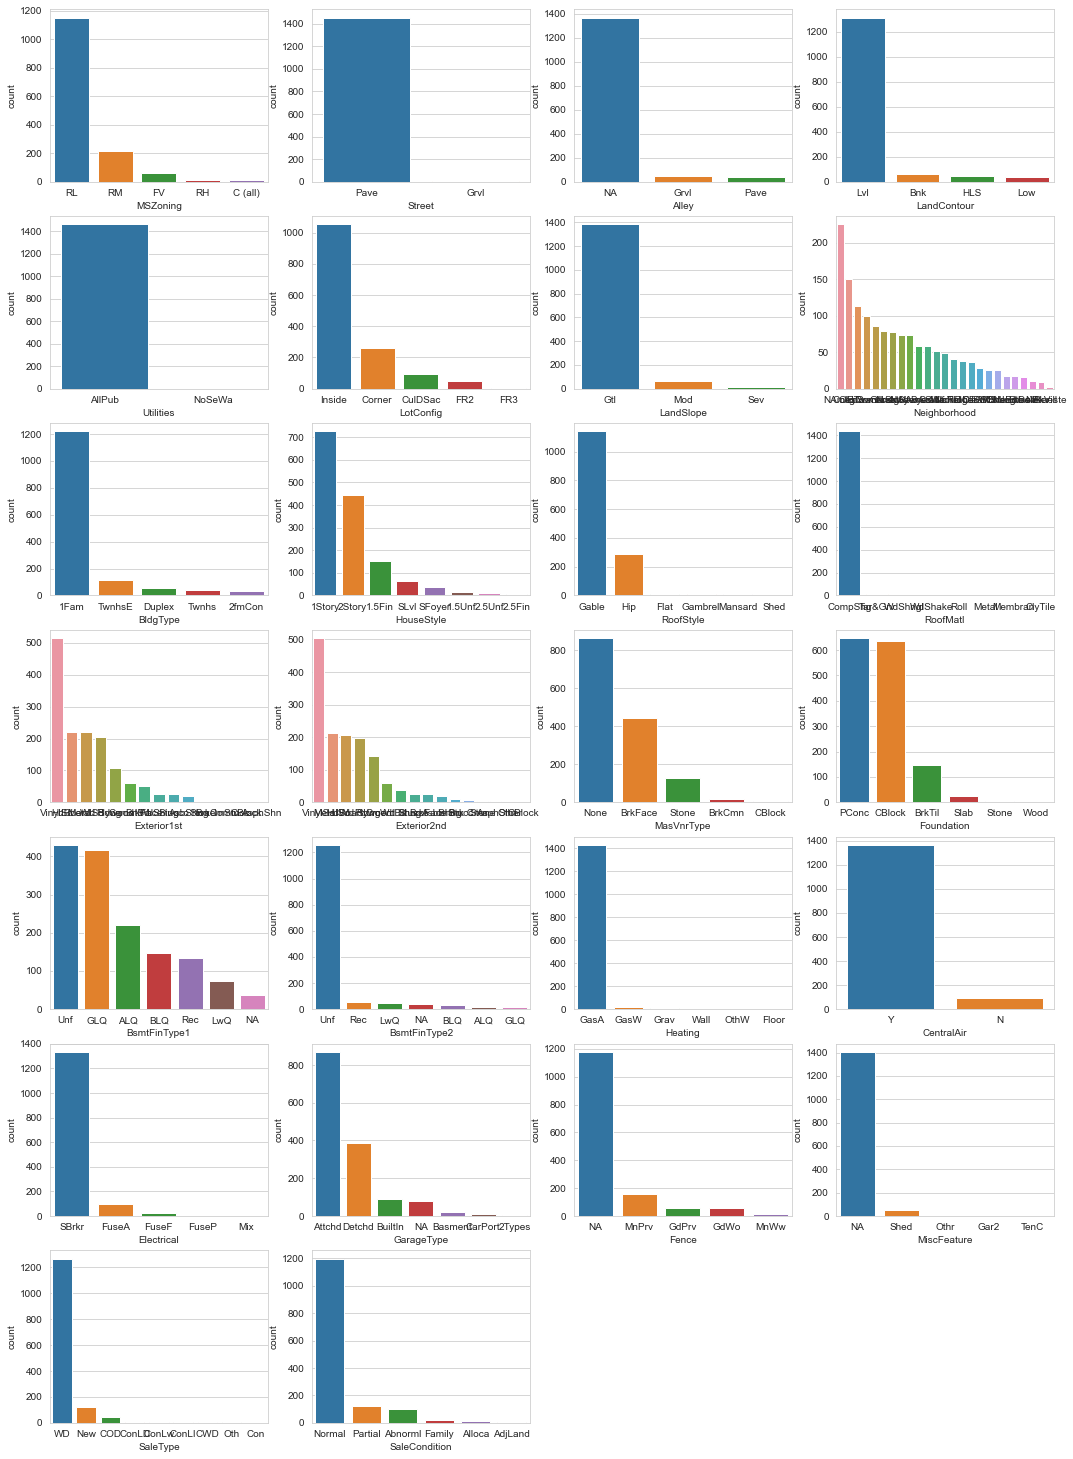

In [208]:
# create list of remaining categorical features
one_hot_feats=df.select_dtypes(exclude=np.number).columns

plt.figure(figsize = (18, len(one_hot_feats)))
for i in range(0, len(one_hot_feats)):
    plt.subplot(int(np.ceil(len(one_hot_feats) / 4)), 4, i + 1)
    sns.countplot(data = df[df['LogSalePrice'].isna() == False], x = one_hot_feats[i],
                  order = df[df['LogSalePrice'].isna() == False].groupby(one_hot_feats[i])['LogSalePrice'].count().sort_values(ascending = False).index)

A few features seem to almost always take the same value, e.g. **Street** is nearly always 'Pave'. Such features may be harmful to our models as they may introduce variance due to the lack of occurrences in the non-dominant values. For each of our remaining categorical features let's see how frequently the most common value occurs.

In [209]:
mode_vals = []
for col in one_hot_feats:
    mode_vals.append((col, 100 * df[df['LogSalePrice'].isna() == False][col].value_counts()[0] / len(train)))
mode_vals

[('MSZoning', 78.83561643835617),
 ('Street', 99.58904109589041),
 ('Alley', 93.76712328767124),
 ('LandContour', 89.79452054794521),
 ('Utilities', 99.93150684931507),
 ('LotConfig', 72.05479452054794),
 ('LandSlope', 94.65753424657534),
 ('Neighborhood', 15.41095890410959),
 ('BldgType', 83.56164383561644),
 ('HouseStyle', 49.726027397260275),
 ('RoofStyle', 78.15068493150685),
 ('RoofMatl', 98.21917808219177),
 ('Exterior1st', 35.273972602739725),
 ('Exterior2nd', 34.52054794520548),
 ('MasVnrType', 59.178082191780824),
 ('Foundation', 44.31506849315068),
 ('BsmtFinType1', 29.45205479452055),
 ('BsmtFinType2', 86.0958904109589),
 ('Heating', 97.8082191780822),
 ('CentralAir', 93.4931506849315),
 ('Electrical', 91.43835616438356),
 ('GarageType', 59.58904109589041),
 ('Fence', 80.75342465753425),
 ('MiscFeature', 96.3013698630137),
 ('SaleType', 86.78082191780823),
 ('SaleCondition', 82.05479452054794)]

Over 99.5% of **Street** values are 'Pave' and over 99.9% of **Utilities** values are 'AllPub'. As such any machine learning models are unlikely to gain anything useful from these features. In fact, these features will likely increase variance and contribute to overfitting. Thus we drop both **Street** and **Utilities**.

In [210]:
df.drop(['Street', 'Utilities'], axis = 1, inplace = True)
one_hot_feats = one_hot_feats.tolist()
one_hot_feats.remove('Street')
one_hot_feats.remove('Utilities')

There were a few features which we engineered, like **HasPool** or **HasMiscFeature**, which seemed to almost always take on the same value. Should we drop these features as well?

In [212]:
new_mode_vals = []
for col in new_has_feats:
    new_mode_vals.append((col, 100 * df[df['LogSalePrice'].isna() == False][col].value_counts()[0] / len(train)))
new_mode_vals

[('HasBsmt', 2.5342465753424657),
 ('Has2ndFlr', 56.78082191780822),
 ('HasGarage', 5.5479452054794525),
 ('HasPool', 99.52054794520548),
 ('HasMiscFeature', 96.43835616438356),
 ('HasAlley', 93.76712328767124),
 ('HasFence', 80.75342465753425)]

Over 99.5% of houses take on the same value for **HasPool**. Consequently this feature is unlikely to be useful. Thus we drop it.

In [213]:
df.drop('HasPool', axis = 1, inplace = True)

Note that for several features we have that many values occur quite infrequently. For example, in **RoofStyle** the values 'Flat', 'Gambrel', 'Mansard', and 'Shed' almost never occur. For these it might be beneficial to group these infrequent values to form an 'Other' category.

How shall we decide what constitutes being infrequent? While somewhat arbitrary, we declare than any values which occur in less than 1% of the data are grouped together to form an 'Other' category.

In [214]:
# create a dictionary to store infrequent values in categorical features
cat_dict = dict()

# determine the infrequent values
for col in one_hot_feats:
    temp = df[df['LogSalePrice'].isna() == False][col].value_counts()
    cat_dict[col] = temp[temp < 0.01 * len(train)].index

# replace the infrequent entries
for col in one_hot_feats:
    df[col].replace(cat_dict[col], 'Other', inplace = True)

Let's take a look at some box plots of **LogSalePrice** against our categorical features after combining some values together.

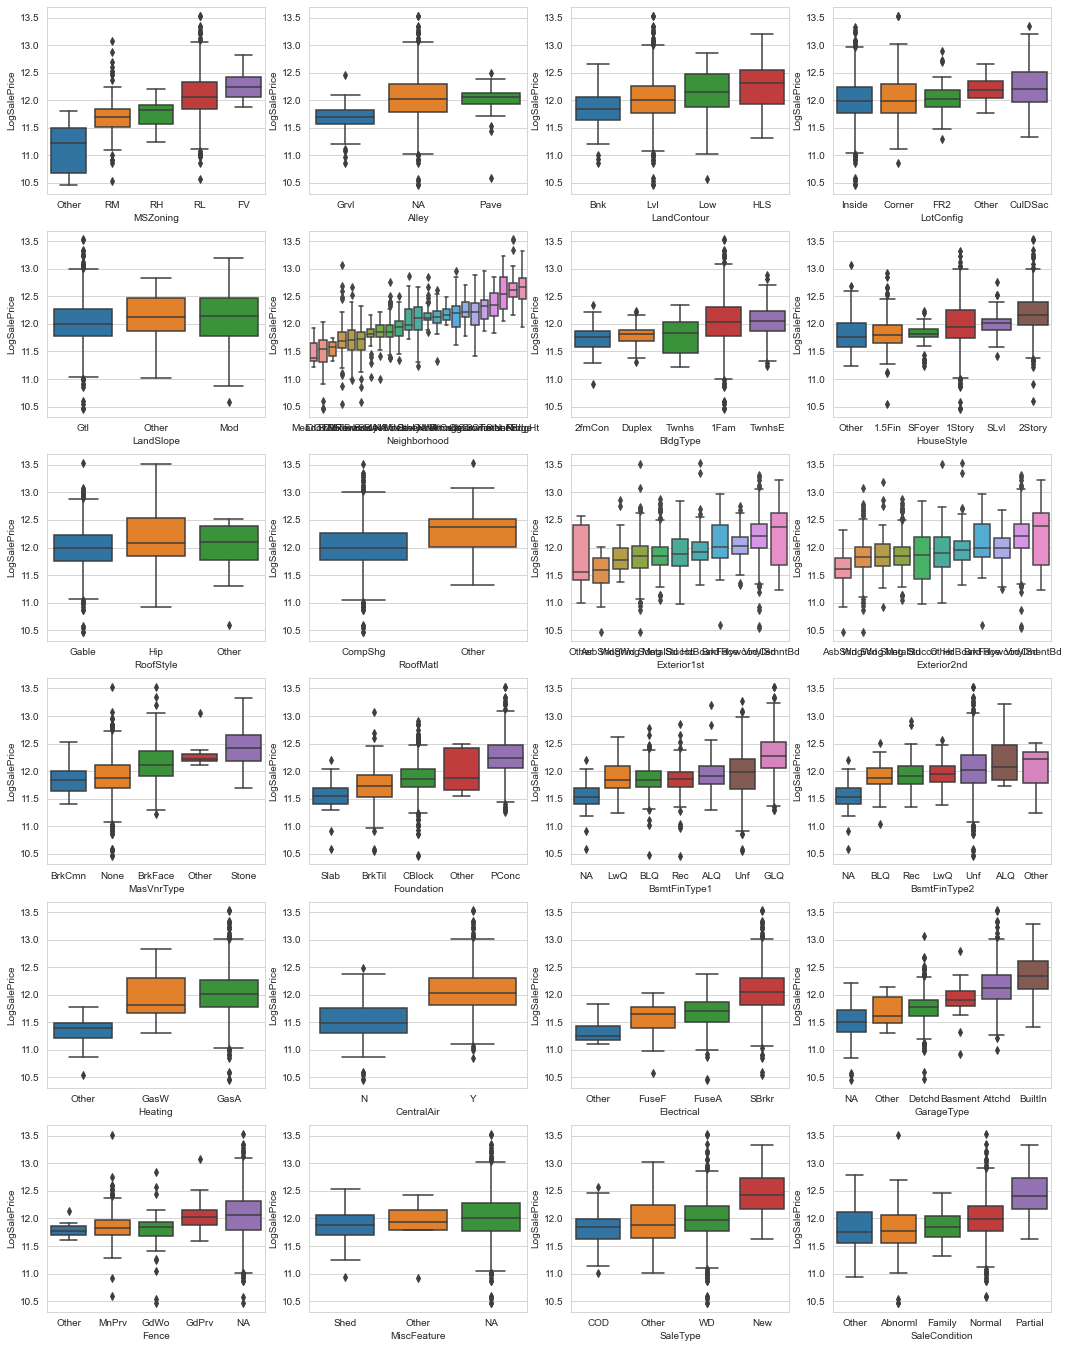

In [215]:
plt.figure(figsize = (18, len(one_hot_feats)))
for i in range(0, len(one_hot_feats)):
    plt.subplot(int(np.ceil(len(one_hot_feats) / 4)), 4, i + 1)
    sns.boxplot(data = df[df['LogSalePrice'].isna() == False], x = one_hot_feats[i], y = 'LogSalePrice',
                  order = df[df['LogSalePrice'].isna() == False].groupby(one_hot_feats[i])['LogSalePrice'].median().sort_values().index)

Let's go ahead and one-hot encode all the categorical features.

In [216]:
df = pd.get_dummies(df, columns = one_hot_feats, drop_first = True)

## Dropping Unnecessary Features

For the most part the features in our dataset should help us in predicting sale price. However, there are two features which are unlikely to be helpful: **MoSold** and **YrSold**. These two features record the month and year, respectively, when a given house was sold. It seems reasonable that a house's sale price is uncorrelated with the month it was sold. This is demonstrated in the following plots.

<AxesSubplot:xlabel='MoSold', ylabel='LogSalePrice'>

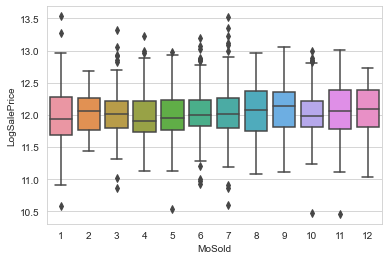

In [217]:
sns.boxplot(data = train, x = 'MoSold', y = 'LogSalePrice')

<AxesSubplot:xlabel='MoSold', ylabel='LogSalePrice'>

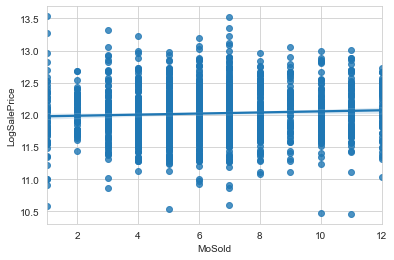

In [218]:
sns.regplot(data = train, x = 'MoSold', y = 'LogSalePrice')

How about **YrSold**? One might expect that **YrSold** may correlate with sale price. Indeed, due to inflation alone the pprice of a house should increase over time. Let's see why **YrSold** is not actually a useful feature.

In [219]:
train['YrSold'].describe()

count    1460.000000
mean     2007.815753
std         1.328095
min      2006.000000
25%      2007.000000
50%      2008.000000
75%      2009.000000
max      2010.000000
Name: YrSold, dtype: float64

We note that ur dataset consists solely of houses sold between 2006 and 2010, which is not that long of a period. The plots below further suggest we should drop **YrSold**.

<AxesSubplot:xlabel='YrSold', ylabel='LogSalePrice'>

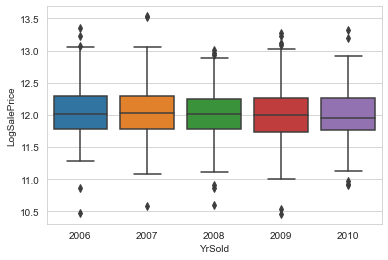

In [220]:
sns.boxplot(data = train, x = 'YrSold', y = 'LogSalePrice')

<AxesSubplot:xlabel='YrSold', ylabel='LogSalePrice'>

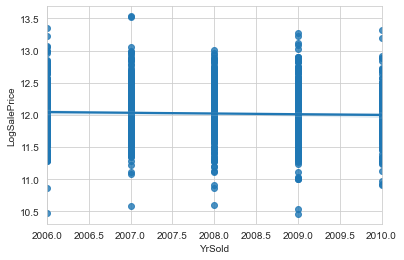

In [221]:
sns.regplot(data = train, x = 'YrSold', y = 'LogSalePrice')

To top it all off we can see there is essentially no correlation between **LogSalePrice**, **MoSold**, and **YrSold**.

In [222]:
train[['LogSalePrice', 'MoSold', 'YrSold']].corr()

,LogSalePrice,MoSold,YrSold
LogSalePrice,1.000000,0.057329,-0.037263
MoSold,0.057329,1.000000,-0.145721
YrSold,-0.037263,-0.145721,1.000000


We thus drop **MoSold** and **YrSold**.

In [223]:
df.drop(['MoSold', 'YrSold'], axis = 1, inplace = True)

## Predictions

We are now ready to make some predictions using our data. Let's redefine our training and test sets to account for the feature engineering we performed.

In [224]:
train = df[df['LogSalePrice'].isna() == False]
test = df[df['LogSalePrice'].isna()]

Before we create any predictions we should scale our data.

In [225]:
from sklearn.preprocessing import MinMaxScaler

In [226]:
scaler = MinMaxScaler()

train_s = train.copy() # without this the scaled data would be an array; this ensures we get a dataframe; more aestheically pleasing
train_s[train_s.columns] = scaler.fit_transform(train[train.columns])

test_s = test.copy() # same as above
test_s[test_s.columns] = scaler.transform(test[test.columns])
test_s.drop('LogSalePrice', axis = 1, inplace = True)

When implementing any machine learning algorithms we should ensure we split our training data into training and validation sets. Moreover, we should use metrics such as the RMSE to evaluate how well our models perform. We import the relevant modules.

In [265]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error, explained_variance_score

In [266]:
kf = KFold(n_splits = 5, shuffle = True, random_state = 18)

Let's try out some models, beginning with a linear regression.

### Linear Regression

In [228]:
from sklearn.linear_model import LinearRegression

In [271]:
# initialize the variables
i = 1
y_test_lm = []
pred_lm = []
rmse_lm = []
var_lm = []

# iterate through the k-fold split
for trainer, tester in kf.split(train_s):
    
    # define the training and test data
    X_train = train_s.iloc[trainer].drop('LogSalePrice', axis = 1)
    X_test = train_s.iloc[tester].drop('LogSalePrice', axis = 1)
    y_train = train_s.iloc[trainer]['LogSalePrice']
    y_test = train_s.iloc[tester]['LogSalePrice']
    
    # fit the linear regression model
    lm = LinearRegression()
    lm.fit(X_train, y_train)
    
    # make predictions
    lm_pred = lm.predict(X_test)
    
    # record current metrics
    lm_rmse = mean_squared_error(y_test, lm_pred, squared = False)
    lm_norm_rmse = 100 * lm_rmse / np.ptp(train_s['LogSalePrice'])
    lm_var = explained_variance_score(y_test, lm_pred)
    
    # print current metrics
    print('Normalized RMSE on Fold', str(i) + ':', str(lm_norm_rmse) + '%')
    print('Explained Variance Score on Fold', str(i) + ':', lm_var)
    print('\n')
    i = i + 1
    
    # record data
    y_test_lm.append(y_test)
    pred_lm.append(lm_pred)
    rmse_lm.append(lm_norm_rmse)
    var_lm.append(lm_var)

# print mean metrics
print('Mean Normalized RMSE:', str(np.mean(rmse_lm)) + '%')
print('Mean Explained Variance Score:', np.mean(var_lm))

Normalized RMSE on Fold 1: 3.7253370526794347%
Explained Variance Score on Fold 1: 0.9132797658444483


Normalized RMSE on Fold 2: 4.894376698952915%
Explained Variance Score on Fold 2: 0.867725753114839


Normalized RMSE on Fold 3: 4.07475962441727%
Explained Variance Score on Fold 3: 0.9010188143579737


Normalized RMSE on Fold 4: 4.613840069006841%
Explained Variance Score on Fold 4: 0.8708366905231055


Normalized RMSE on Fold 5: 4.561157577978677%
Explained Variance Score on Fold 5: 0.8795734666441789


Mean Normalized RMSE: 4.373894204607028%
Mean Explained Variance Score: 0.8864868980969091


The results of a simple linear regression appear quite decent. However, we can likely improve our results if we use a ridge or lasso regression instead.

### Ridge Regression

A basic linear regression works best when our features are uncorrelated, but that is quite unlikely to be the case here. For instance, **YearBuilt**, which records the year a house was built, correlates quite strongly with **GarageYrBlt**, the year a house's garage was built.

In [230]:
train[['YearBuilt','GarageYrBlt']].corr()

,YearBuilt,GarageYrBlt
YearBuilt,1.000000,0.845141
GarageYrBlt,0.845141,1.000000


When the features are correlated a ridge regression will often perform better than a standard linear regression.

In [231]:
from sklearn.linear_model import RidgeCV

In [270]:
# initialize the variables
i = 1
y_test_rid = []
pred_rid = []
rmse_rid = []
var_rid = []

# iterate through the k-fold split
for trainer, tester in kf.split(train_s):
    
    # define the training and test data
    X_train = train_s.iloc[trainer].drop('LogSalePrice', axis = 1)
    X_test = train_s.iloc[tester].drop('LogSalePrice', axis = 1)
    y_train = train_s.iloc[trainer]['LogSalePrice']
    y_test = train_s.iloc[tester]['LogSalePrice']
    
    # fit the ridge regressor
    rid = RidgeCV(alphas = (3e-1, 1e0, 3e0, 1e1))
    rid.fit(X_train, y_train)
    
    # make predictions
    rid_pred = rid.predict(X_test)
    
    # record current metrics
    rid_rmse = mean_squared_error(y_test, rid_pred, squared = False)
    rid_norm_rmse = 100 * rid_rmse / np.ptp(train_s['LogSalePrice'])
    rid_var = explained_variance_score(y_test, rid_pred)
    
    # print current metrics
    print('Normalized RMSE on Fold', str(i) + ':', str(rid_norm_rmse) + '%')
    print('Explained Variance Score on Fold', str(i) + ':', rid_var)
    print('Alpha on Fold', str(i) + ':', rid.alpha_)
    print('\n')
    i = i + 1
    
    # record data
    y_test_rid.append(y_test)
    pred_rid.append(rid_pred)
    rmse_rid.append(rid_norm_rmse)
    var_rid.append(rid_var)

# print mean metrics
print('Mean Normalized RMSE:', str(np.mean(rmse_rid)) + '%')
print('Mean Explained Variance Score:', np.mean(var_rid))

Normalized RMSE on Fold 1: 3.548770469369997%
Explained Variance Score on Fold 1: 0.9210514962656938
Alpha on Fold 1: 3.0


Normalized RMSE on Fold 2: 4.727311741918947%
Explained Variance Score on Fold 2: 0.8764252712091976
Alpha on Fold 2: 1.0


Normalized RMSE on Fold 3: 3.9684224231203538%
Explained Variance Score on Fold 3: 0.9065455689723985
Alpha on Fold 3: 3.0


Normalized RMSE on Fold 4: 4.562261271805876%
Explained Variance Score on Fold 4: 0.8738493992952323
Alpha on Fold 4: 3.0


Normalized RMSE on Fold 5: 4.279219833362518%
Explained Variance Score on Fold 5: 0.8940147256861266
Alpha on Fold 5: 3.0


Mean Normalized RMSE: 4.217197147915538%
Mean Explained Variance Score: 0.8943772922857297


As anticipated the ridge regressor outperforms the standard linear regression.

### Lasso Regression

A lasso regression model may also prove beneficial here. Lasso models perform well in cases where only a fraction of the features are important. This is the case here as we previously noted that certain features, such as **HasPool** and **HasMiscFeature**, are unlikely to be important.

In [233]:
from sklearn.linear_model import LassoCV

In [268]:
# initialize the variables
i = 1
y_test_las = []
pred_las = []
rmse_las = []
var_las = []

# iterate through the k-fold split
for trainer, tester in kf.split(train_s):
    
    # define the training and test data
    X_train = train_s.iloc[trainer].drop('LogSalePrice', axis = 1)
    X_test = train_s.iloc[tester].drop('LogSalePrice', axis = 1)
    y_train = train_s.iloc[trainer]['LogSalePrice']
    y_test = train_s.iloc[tester]['LogSalePrice']
    
    # fit the lasso regressor
    las = LassoCV(max_iter = 1e4, n_alphas = 1000)
    las.fit(X_train, y_train)
    
    # make predictions
    las_pred = las.predict(X_test)
    
    # record current metrics
    las_rmse = mean_squared_error(y_test, las_pred, squared = False)
    las_norm_rmse = 100 * las_rmse / np.ptp(train_s['LogSalePrice'])
    las_var = explained_variance_score(y_test, las_pred)
    
    # print current metrics
    print('Normalized RMSE on Fold', str(i) + ':', str(las_norm_rmse) + '%')
    print('Explained Variance Score on Fold', str(i) + ':', las_var)
    print('Alpha on Fold', str(i) + ':', las.alpha_)
    print('\n')
    i = i + 1
    
    # record data
    y_test_las.append(y_test)
    pred_las.append(las_pred)
    rmse_las.append(las_norm_rmse)
    var_las.append(las_var)

# print mean metrics
print('Mean Normalized RMSE:', str(np.mean(rmse_las)) + '%')
print('Mean Explained Variance Score:', np.mean(var_las))

Normalized RMSE on Fold 1: 3.3782108709198226%
Explained Variance Score on Fold 1: 0.9284834916814922
Alpha on Fold 1: 0.00017067020839085833


Normalized RMSE on Fold 2: 4.541919709970852%
Explained Variance Score on Fold 2: 0.8857384842660163
Alpha on Fold 2: 0.00017694680556266368


Normalized RMSE on Fold 3: 3.8041909747865743%
Explained Variance Score on Fold 3: 0.9141076526830627
Alpha on Fold 3: 0.00016223658156275234


Normalized RMSE on Fold 4: 4.446688781510807%
Explained Variance Score on Fold 4: 0.8801082109836094
Alpha on Fold 4: 0.00014787845232908505


Normalized RMSE on Fold 5: 4.162779837820184%
Explained Variance Score on Fold 5: 0.8998370525461787
Alpha on Fold 5: 0.00014901160915674206


Mean Normalized RMSE: 4.066758035001649%
Mean Explained Variance Score: 0.9016549784320718


The lasso regressor in turn outperforms the ridge regressor.

### Elastic Net Regression

As elastic net regressor is a sort of combination of ridge and lasso regressors. Let's see how well it performs.

In [235]:
from sklearn.linear_model import ElasticNetCV

In [272]:
# initialize the variables
i = 1
y_test_ela = []
pred_ela = []
rmse_ela = []
var_ela = []

# iterate through the k-fold split
for trainer, tester in kf.split(train_s):
    
    # define the training and test data
    X_train = train_s.iloc[trainer].drop('LogSalePrice', axis = 1)
    X_test = train_s.iloc[tester].drop('LogSalePrice', axis = 1)
    y_train = train_s.iloc[trainer]['LogSalePrice']
    y_test = train_s.iloc[tester]['LogSalePrice']
    
    # fit the elastic net regressor
    ela = ElasticNetCV(l1_ratio = [0.1, 0.3, 0.6, 0.9, 0.95, 0.99, 1], max_iter = 1e4, n_alphas = 1000)
    ela.fit(X_train, y_train)
    
    # make predictions
    ela_pred = ela.predict(X_test)
    
    # record current metrics
    ela_rmse = mean_squared_error(y_test, ela_pred, squared = False)
    ela_norm_rmse = 100 * ela_rmse / np.ptp(train_s['LogSalePrice'])
    ela_var = explained_variance_score(y_test, ela_pred)
    
    # print current metrics
    print('Normalized RMSE on Fold', str(i) + ':', str(ela_norm_rmse) + '%')
    print('Explained Variance Score on Fold', str(i) + ':', ela_var)
    print('Alpha on Fold', str(i) + ':', ela.alpha_)
    print('L1 Ratio on Fold', str(i) + ':', ela.l1_ratio_)
    print('\n')
    i = i + 1
    
    # record data
    y_test_ela.append(y_test)
    pred_ela.append(ela_pred)
    rmse_ela.append(ela_norm_rmse)
    var_ela.append(ela_var)

# print mean metrics
print('Mean Normalized RMSE:', str(np.mean(rmse_ela)) + '%')
print('Mean Explained Variance Score:', np.mean(var_ela))

Normalized RMSE on Fold 1: 3.3782108709198226%
Explained Variance Score on Fold 1: 0.9284834916814922
Alpha on Fold 1: 0.00017067020839085833
L1 Ratio on Fold 1: 1.0


Normalized RMSE on Fold 2: 4.541919709970852%
Explained Variance Score on Fold 2: 0.8857384842660163
Alpha on Fold 2: 0.00017694680556266368
L1 Ratio on Fold 2: 1.0


Normalized RMSE on Fold 3: 3.8076586561251573%
Explained Variance Score on Fold 3: 0.9139505114447616
Alpha on Fold 3: 0.0001815136460157188
L1 Ratio on Fold 3: 0.9


Normalized RMSE on Fold 4: 4.446688781510807%
Explained Variance Score on Fold 4: 0.8801082109836094
Alpha on Fold 4: 0.00014787845232908505
L1 Ratio on Fold 4: 1.0


Normalized RMSE on Fold 5: 4.162779837820184%
Explained Variance Score on Fold 5: 0.8998370525461787
Alpha on Fold 5: 0.00014901160915674206
L1 Ratio on Fold 5: 1.0


Mean Normalized RMSE: 4.067451571269364%
Mean Explained Variance Score: 0.9016235501844116


The elastic net results are essentially identical to the lasso results. This makes sense since the L1 ratio in the elastic net regressor is 1 on all but one folds, indicating that the elastic net regressor can hardly improve upon the lasso regressor.

### Neural Network

Let's see how a neural network model fares against the elastic net regressor.

In [242]:
len(train_s.columns) # determine the number of neurons in the input layer

173

In [243]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [273]:
# initialize the variables
kf = KFold(n_splits = 5, shuffle = True, random_state = 18)
i = 1
stop = EarlyStopping(mode = 'min', patience = 20, restore_best_weights = True)
y_test_ann = []
pred_ann = []
rmse_ann = []
var_ann = []

# iterate through the k-fold split
for trainer, tester in kf.split(train_s):
    
    # create the model
    model = Sequential()
    model.add(Dense(units = 173, activation = 'relu'))
#     model.add(Dropout(0.2))
    model.add(Dense(units = 87, activation = 'relu'))
#     model.add(Dropout(0.5))
    model.add(Dense(units = 44, activation = 'relu'))
#     model.add(Dropout(0.5))
    model.add(Dense(units = 22, activation = 'relu'))
#     model.add(Dropout(0.5))
    model.add(Dense(units = 1))
    model.compile(optimizer = 'adam', loss = 'mse')
    
    # define the training and test variables
    X_train = train_s.iloc[trainer].drop('LogSalePrice', axis = 1)
    X_test = train_s.iloc[tester].drop('LogSalePrice', axis = 1)
    y_train = train_s.iloc[trainer]['LogSalePrice']
    y_test = train_s.iloc[tester]['LogSalePrice']

    # fit the model
    model.fit(x = X_train, y = y_train, epochs = 1000, verbose = 0, callbacks = [stop], validation_data = (X_test, y_test))
    
    # make predictions
    ann_pred = model.predict(X_test)
    
    # record current metrics
    ann_rmse = mean_squared_error(y_test, ann_pred, squared = False)
    ann_norm_rmse = 100 * ann_rmse / np.ptp(train_s['LogSalePrice'])
    ann_var = explained_variance_score(y_test, ann_pred)
    
    # print current metrics
    print('Normalized RMSE on Fold', str(i) + ':', str(ann_norm_rmse) + '%')
    print('Explained Variance Score on Fold', str(i) + ':', ann_var)
    print('\n')
    i = i + 1
    
    # record data
    y_test_ann.append(y_test)
    pred_ann.append(ann_pred)
    rmse_ann.append(ann_norm_rmse)
    var_ann.append(ann_var)

# print mean metrics
print('Mean Normalized RMSE:', str(np.mean(rmse_ann)) + '%')
print('Mean Explained Variance Score:', np.mean(var_ann))

Normalized RMSE on Fold 1: 4.181162759249169%
Explained Variance Score on Fold 1: 0.8910280599155633


Normalized RMSE on Fold 2: 4.954418971701604%
Explained Variance Score on Fold 2: 0.8626597029885665


Normalized RMSE on Fold 3: 5.131551736719501%
Explained Variance Score on Fold 3: 0.8453800550776718


Normalized RMSE on Fold 4: 5.027167693344084%
Explained Variance Score on Fold 4: 0.8467151229881612


Normalized RMSE on Fold 5: 4.989561647911742%
Explained Variance Score on Fold 5: 0.856061392039399


Mean Normalized RMSE: 4.8567725617852195%
Mean Explained Variance Score: 0.8603688666018723


Somewhat surprisingly, the predictions from the neural network do not seem to be as accurate as those arising from the linear regression models. Indeed, even a basic linear regression appears to perform better.

### Ensemble Voting

As our final method we average the results of the lasso regressor with a neural network.

In [284]:
# initialize the variables
y_test_vot = []
pred_vot = []
rmse_vot = []
var_vot = []

# iterate through the k-fold split
for i in range(0, 5):
    
    # retrieve the current test data
    y_test = y_test_ann[i]
    
    # retrieve the lasso and neural network predictions
    las_pred = pred_las[i]
    ann_pred = pred_ann[i]
    ann_pred = ann_pred.reshape(ann_pred.shape[0])
    
    # create the voting ensemble prediction by averaging
    vot_pred = (las_pred + ann_pred) / 2
    
    # record current metrics
    vot_rmse = mean_squared_error(y_test, vot_pred, squared = False)
    vot_norm_rmse = 100 * vot_rmse / np.ptp(train_s['LogSalePrice'])
    vot_var = explained_variance_score(y_test, vot_pred)
    
    # print current metrics
    print('Normalized RMSE on Fold', str(i+1) + ':', str(vot_norm_rmse) + '%')
    print('Explained Variance Score on Fold', str(i+1) + ':', vot_var)
    print('\n')
    
    # record data
    y_test_vot.append(y_test)
    pred_vot.append(vot_pred)
    rmse_vot.append(vot_norm_rmse)
    var_vot.append(vot_var)

# print mean metrics
print('Mean Normalized RMSE:', str(np.mean(rmse_vot)) + '%')
print('Mean Explained Variance Score:', np.mean(var_vot))

Normalized RMSE on Fold 1: 3.455315630850217%
Explained Variance Score on Fold 1: 0.9255524871265786


Normalized RMSE on Fold 2: 4.538656556211647%
Explained Variance Score on Fold 2: 0.885015027581469


Normalized RMSE on Fold 3: 4.20643536404699%
Explained Variance Score on Fold 3: 0.8944620199781115


Normalized RMSE on Fold 4: 4.4651345899528%
Explained Variance Score on Fold 4: 0.8790995711502858


Normalized RMSE on Fold 5: 4.299908915841913%
Explained Variance Score on Fold 5: 0.8931510135161276


Mean Normalized RMSE: 4.193090211380714%
Mean Explained Variance Score: 0.8954560238705145


The lasso regressor on its own seems to perform better than the voting ensemble. Ultimately the lasso regression model gave the best results on the validation data. We thus use this model to make our final prediction.

In [280]:
# define the train and test sets
X_train = train_s.drop('LogSalePrice', axis = 1)
X_test = test_s
y_train = train_s['LogSalePrice']

# fit the lasso regressor
fin = LassoCV(max_iter = 1e4, n_alphas = 1000)
fin.fit(X_train, y_train)
    
# make predictions
fin_pred = fin.predict(X_test)

# undo the scaling
dummy = pd.DataFrame(np.zeros((len(test_s), len(train_s.columns))), columns = train_s.columns)
dummy['LogSalePrice'] = fin_pred
dummy = pd.DataFrame(scaler.inverse_transform(dummy), columns = train_s.columns)
log_pred = dummy['LogSalePrice']

# undo the logarithmic transformation
pred = np.exp(log_pred)

How reasonable are our predictions? Let's plot a histogram of our predictions versus our original training data.

Text(0.5, 1.0, 'Histogram of Training Sale Price')

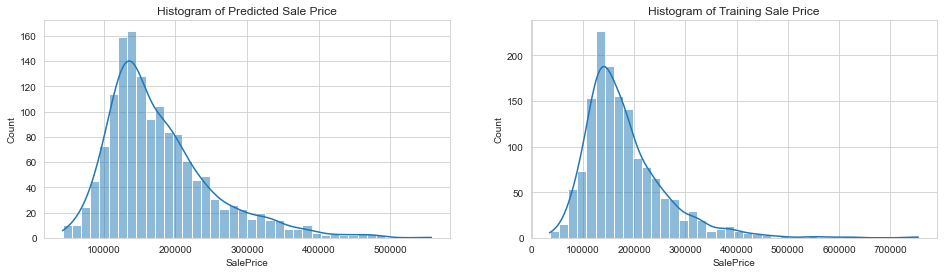

In [281]:
# reread the original training dataset
orig_train = pd.read_csv('train.csv', index_col = 'Id')

# plot histograms
plt.figure(figsize = (16, 4))
plt.subplot(1, 2, 1)
sns.histplot(x = pred, kde = True, bins = 40)
plt.title('Histogram of Predicted Sale Price')
plt.xlabel('SalePrice')
plt.subplot(1, 2, 2)
sns.histplot(data = orig_train, x = 'SalePrice', kde = True, bins = 40)
plt.title('Histogram of Training Sale Price')

Our predicted sale price looks fairly reasonable. Let's create a csv file to submit to Kaggle.

In [283]:
# reread the original test dataset
orig_test = pd.read_csv('test.csv', index_col = 'Id')

# create the csv file
submission = pd.DataFrame(data = {'SalePrice' : pred.values}, index = orig_test.index)
submission.to_csv(path_or_buf = 'submission.csv')

This submission places us at the 22nd percentile of Kaggle's leaderboard, which is not too bad! There is certainly room for improvement however. We could definitely inspect each feature more closely and engineer uniquely instead of our broad engineering. Moreover, we used nearly all the available features and yet it is quite likely that some features were poorly correlated with sale price and instead increased variance. These features should probably be dropped.

We could also refine how we imputed the missing data. There are plenty of ways to improve our predictions but as a first attempt this was quite good! Perhaps we will revisit this project at a later data but for now we will leave it as is.